##Customer Churn Prediction: Survival Analysis





In [89]:
"""
Customer Churn Survival Analysis - Import and Setup

This script performs exploratory data analysis (EDA) and survival modeling
to predict customer churn using the Telco Customer Churn dataset.
It begins by importing the required Python libraries for data manipulation,
visualization, and statistical modeling.
"""

# =====================================================================
# Import essential libraries
# =====================================================================

# Numerical computing and linear algebra operations
import numpy as np

# Data manipulation and analysis (DataFrames, Series, etc.)
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn plotting style for better visuals
sns.set_style('darkgrid')

# (Optional) Ensure inline plotting in Jupyter/Colab
# %matplotlib inline


In [90]:
"""
Load the Telco Customer Churn dataset.

This section imports the Telco Customer Churn dataset into a pandas DataFrame.
The dataset contains customer demographic and service-related information,
along with a churn indicator that specifies whether the customer left the company.
"""

# =====================================================================
# Load dataset
# =====================================================================

# Read the Telco Customer Churn dataset from the specified file path
customer_data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display the first few rows to inspect structure and column names
customer_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [91]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [92]:
customer_data.shape

(7043, 21)

## Exploratory Data Analysis

In [93]:
"""
Data Cleaning: Drop unnecessary columns.

This section removes columns that are not useful for analysis or modeling.
- 'customerID' is a unique identifier and does not provide predictive value.
- 'TotalCharges' is dropped either due to missing or inconsistent values,
  or because it is highly correlated with 'MonthlyCharges' and 'tenure'.
"""

# =====================================================================
# Drop irrelevant or redundant columns
# =====================================================================

# Remove the customer ID column (non-informative for modeling)
customer_data.drop(["customerID"], axis=1, inplace=True)

# Remove TotalCharges (can be redundant or contain invalid entries)
customer_data.drop(["TotalCharges"], axis=1, inplace=True)


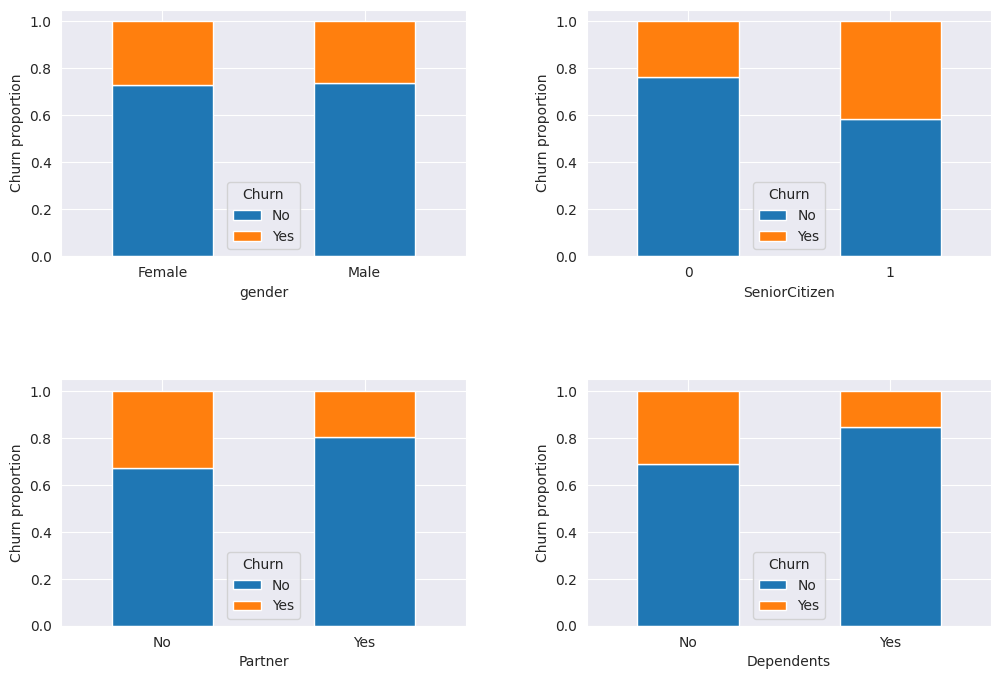

In [94]:
"""
Visualize churn distribution across categorical features.

This section defines a helper function `get_plot()` to visualize the percentage
of customers who churned versus stayed, grouped by selected categorical variables.
Stacked bar plots are created to show how churn rates differ across categories
(such as gender, senior citizen status, having a partner, or dependents).
"""

# =====================================================================
# Function to plot churn distribution by categorical variable
# =====================================================================

def get_plot(df, group, target, ax):
    """
    Generate a stacked bar plot showing churn percentages for a given categorical feature.

    Parameters
    ----------
    df : pandas.DataFrame
        The dataset containing customer information.
    group : str
        The name of the categorical column to group by (e.g., 'gender', 'Partner').
    target : str
        The binary target column indicating churn (e.g., 'Churn').
    ax : matplotlib.axes._axes.Axes
        The subplot axis on which the chart will be drawn.

    Returns
    -------
    None
        The function modifies the provided axis object to display the plot.
    """

    # Compute churn proportions for each group
    temp_df = (
        df.groupby([group, target]).size() /
        df.groupby(group)[target].count()
    ).reset_index().pivot(columns=target, index=group, values=0)

    # Create stacked bar plot
    temp_df.plot(kind='bar', stacked=True, ax=ax)

    # Format axis labels and ticks
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn proportion')

# =====================================================================
# Generate subplots for multiple categorical variables
# =====================================================================

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

get_plot(customer_data, "gender", "Churn", axes[0, 0])
get_plot(customer_data, "SeniorCitizen", "Churn", axes[0, 1])
get_plot(customer_data, "Partner", "Churn", axes[1, 0])
get_plot(customer_data, "Dependents", "Churn", axes[1, 1])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display all plots
plt.show()


In [95]:
customer_data['tenure'].describe()

,tenure
count,7043.000000
mean,32.371149
std,24.559481
min,0.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [96]:
customer_data['tenure'].value_counts().head(10)

,count
tenure,
1,613
72,362
2,238
3,200
4,176
71,170
5,133
7,131
8,123


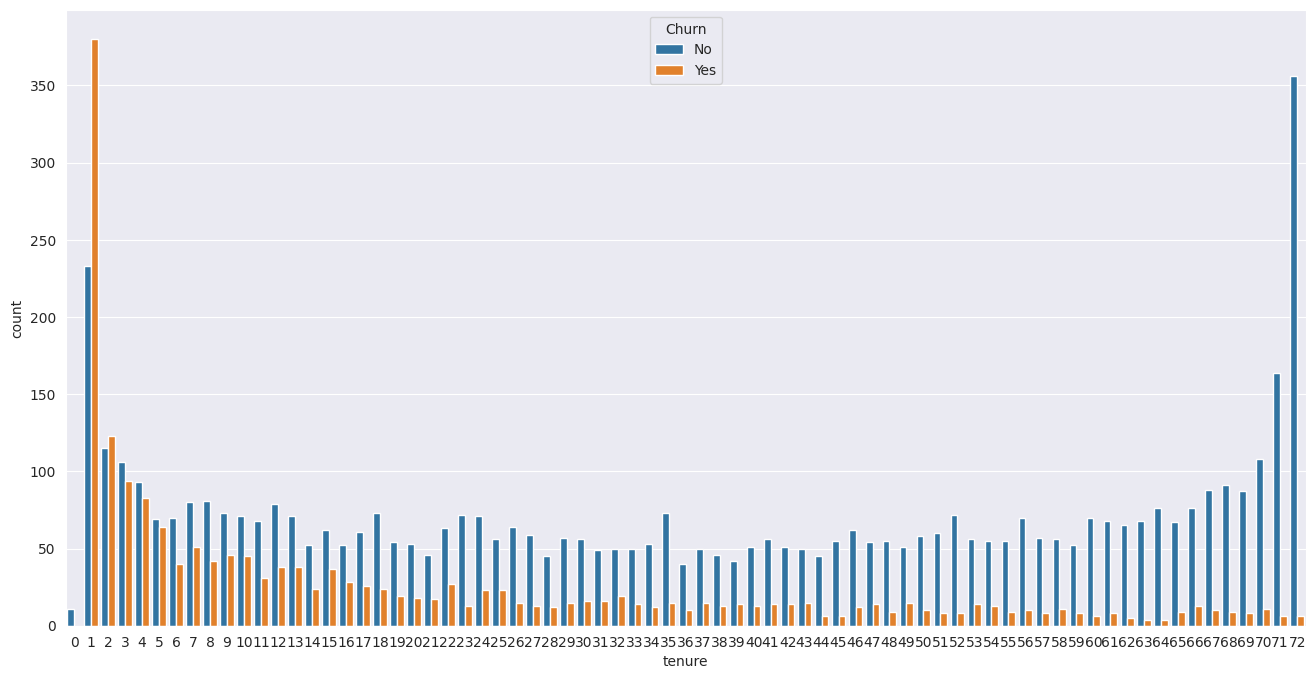

In [97]:
"""
Visualize customer churn distribution across tenure.

This section uses a count plot to show how the number of churned and
retained customers varies with customer tenure (number of months with the company).
This visualization helps identify whether newer or long-term customers
are more likely to churn.
"""

# =====================================================================
# Count plot: Churn distribution by tenure
# =====================================================================

# Set the figure size for better readability
plt.figure(figsize=(16, 8))

# Plot the count of customers by tenure, separated by churn status
sns.countplot(x="tenure", hue="Churn", data=customer_data)

# Display the plot
plt.show()


In [98]:
"""
Feature Engineering: Create tenure groups.

This section categorizes the continuous 'tenure' variable into discrete
intervals representing different customer age groups (in months).
Grouping tenure helps simplify analysis and visualize how churn rates
differ among new, mid-term, and long-term customers.
"""

# =====================================================================
# Function to categorize tenure values into groups
# =====================================================================

def tenure(t):
    """
    Categorize tenure (in months) into discrete groups.

    Parameters
    ----------
    t : int or float
        The customer's tenure in months.

    Returns
    -------
    int
        The group number corresponding to the tenure range:
        1 -> 0–12 months
        2 -> 13–24 months
        3 -> 25–36 months
        4 -> 37–48 months
        5 -> 49–60 months
        6 -> >60 months
    """
    if t <= 12:
        return 1
    elif t <= 24:
        return 2
    elif t <= 36:
        return 3
    elif t <= 48:
        return 4
    elif t <= 60:
        return 5
    else:
        return 6

# =====================================================================
# Apply the grouping function to the dataset
# =====================================================================

# Create a new column 'tenure_group' representing categorized tenure intervals
customer_data["tenure_group"] = customer_data["tenure"].apply(tenure)


In [99]:
"""
Explore the distribution of customers across tenure groups.

This section counts the number of customers within each tenure group
created in the previous step. It helps verify that the grouping function
worked correctly and provides insight into the overall distribution
of customer tenures in the dataset.
"""

# =====================================================================
# Display counts for each tenure group
# =====================================================================

# Count how many customers fall into each tenure interval
customer_data["tenure_group"].value_counts()


,count
tenure_group,
1,2186
6,1407
2,1024
3,832
5,832
4,762


<Axes: xlabel='tenure_group', ylabel='count'>

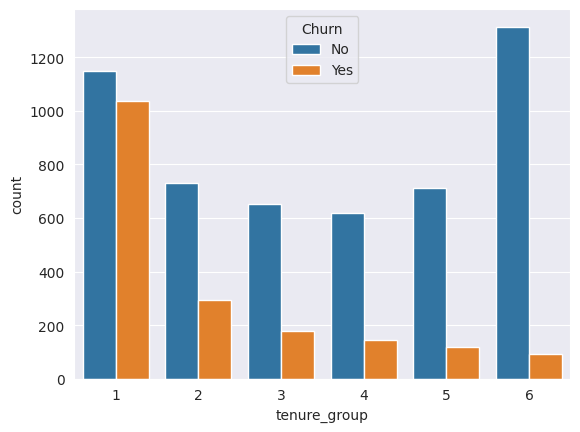

In [100]:
"""
Visualize churn distribution across tenure groups.

This section uses a count plot to compare the number of customers who churned
and those who stayed within each tenure group. The visualization provides
a clear understanding of how churn likelihood changes as customer tenure increases.
"""

# =====================================================================
# Count plot: Churn distribution by tenure group
# =====================================================================

# Create a count plot showing churned vs. retained customers per tenure group
sns.countplot(x="tenure_group", hue="Churn", data=customer_data)


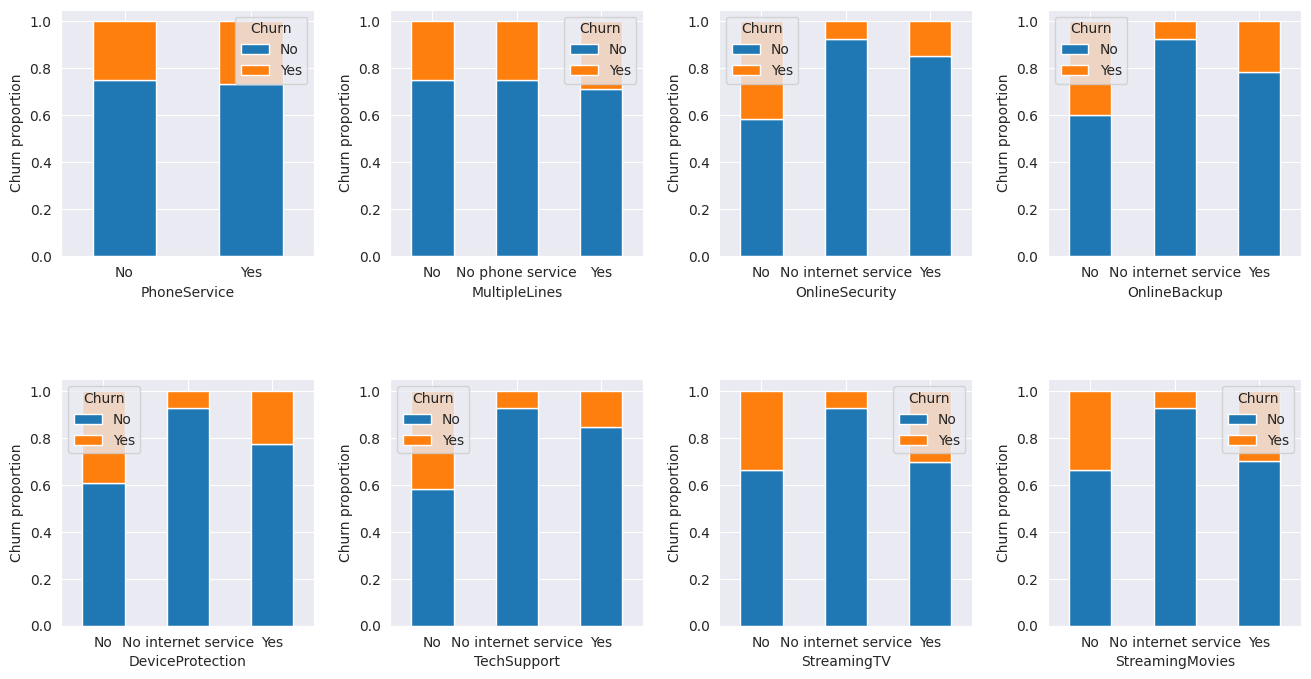

In [101]:
"""
Visualize churn distribution across service-related features.

This section creates a grid of stacked bar plots showing the proportion of
customers who churned versus stayed for several service features such as
PhoneService, OnlineSecurity, TechSupport, and others.

The plots help identify which services or combinations of services
are associated with higher churn rates.
"""

# =====================================================================
# Stacked bar plots: Churn distribution by service-related features
# =====================================================================

# Create a 2x4 grid of subplots with appropriate figure size
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

# Generate stacked bar plots for different service features
get_plot(customer_data, "PhoneService", "Churn", axes[0, 0])
get_plot(customer_data, "MultipleLines", "Churn", axes[0, 1])
get_plot(customer_data, "OnlineSecurity", "Churn", axes[0, 2])
get_plot(customer_data, "OnlineBackup", "Churn", axes[0, 3])
get_plot(customer_data, "DeviceProtection", "Churn", axes[1, 0])
get_plot(customer_data, "TechSupport", "Churn", axes[1, 1])
get_plot(customer_data, "StreamingTV", "Churn", axes[1, 2])
get_plot(customer_data, "StreamingMovies", "Churn", axes[1, 3])

# Adjust spacing between subplots for better layout
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Display all plots
plt.show()


As we can see multiplelines and phoneservice do not add value in the model having similar churn rate.

In all above categories we see consistent results. If a person does not opt for internet service, the customer churning is less. The reason might be the less cost of the service. Also, if they have internet service and does not opt for specific service their probability of churning is high.

# Customer Survival Analysis - Statistical Methods

In [102]:
"""
Install required package: lifelines

The 'lifelines' library provides tools for performing survival analysis,
including Kaplan–Meier estimation, Cox Proportional Hazards modeling,
and parametric survival models (e.g., Weibull, Log-Logistic).

This command installs the library directly into the Colab environment.
"""

# =====================================================================
# Install the lifelines library for survival analysis
# =====================================================================

!pip install lifelines


In [103]:
"""
Import necessary libraries for survival analysis and preprocessing.

This section imports the required Python libraries used for:
- Data manipulation and visualization (pandas, numpy, matplotlib, seaborn)
- Statistical analysis (scipy, statsmodels)
- Encoding categorical variables (LabelEncoder)
- Survival analysis modeling (lifelines)
"""

# =====================================================================
# Data handling and visualization libraries
# =====================================================================
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical computing
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns            # Statistical data visualization

# Configure seaborn style for consistency
sns.set_style('darkgrid')

# =====================================================================
# Statistical and preprocessing tools
# =====================================================================
from scipy.stats import norm              # Statistical functions (e.g., normal distribution)
import statsmodels.api as st              # Advanced statistical modeling
from sklearn.preprocessing import LabelEncoder  # Encode categorical variables into numeric form

# Initialize label encoder instance
labelencoder = LabelEncoder()

# =====================================================================
# Survival analysis library (lifelines)
# =====================================================================
from lifelines import KaplanMeierFitter              # Kaplan–Meier survival estimator
from lifelines.statistics import multivariate_logrank_test, logrank_test  # Hypothesis testing for survival data
from lifelines import CoxPHFitter                    # Cox Proportional Hazards model


## Data Preparation

In [104]:
customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,3
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,4
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No,2
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No,6
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes,1


In [105]:
"""
Encode the target variable 'Churn' into numeric format.

The 'Churn' column contains categorical values ('Yes' or 'No') indicating
whether a customer has left the service. Since most machine learning and
statistical models require numeric input, the column is encoded as:
    - 1 → Customer churned
    - 0 → Customer retained
"""

# =====================================================================
# Encode the binary target variable 'Churn'
# =====================================================================

# Convert categorical churn values ('Yes'/'No') to numeric (1/0)
customer_data["Churn"] = labelencoder.fit_transform(customer_data["Churn"])

# Verify encoding by displaying value counts
customer_data["Churn"].value_counts()


,count
Churn,
0,5174
1,1869


In [106]:
"""
Define time and event variables for survival analysis.

In survival analysis terminology:
- The 'time' variable represents the observed duration for each subject
  (here, the number of months a customer has been with the company).
- The 'event' variable indicates whether the event of interest occurred
  (here, customer churn: 1 = churned, 0 = retained).
"""

# =====================================================================
# Define event and time variables
# =====================================================================

# Binary event variable: 1 if customer churned, 0 if retained
eventvar = customer_data["Churn"]

# Time-to-event variable: tenure (number of months the customer remained active)
timevar = customer_data["tenure"]


For the analysis, I will need to create dummy variables for all categorical variables.

In [107]:
"""
Encode categorical variables for survival modeling.

Many survival models (such as the Cox Proportional Hazards model)
require numeric input. This section converts all categorical features
into binary (dummy) variables using one-hot encoding.

The `drop_first=True` parameter avoids multicollinearity by dropping
one category per feature.
"""

# =====================================================================
# Define categorical columns to be encoded
# =====================================================================

categorical = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
]

# =====================================================================
# One-hot encode categorical variables
# =====================================================================

# Convert categorical variables into dummy/indicator variables
# drop_first=True removes one level from each category to prevent dummy variable trap
survivaldata = pd.get_dummies(customer_data, columns=categorical, drop_first=True)

# Preview the encoded dataset
survivaldata.head()


,tenure,MonthlyCharges,Churn,tenure_group,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,0,1,False,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,34,56.95,0,3,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,2,53.85,1,1,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,45,42.30,0,4,True,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,2,70.70,1,1,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [108]:
"""
Prepare the dataset for survival regression modeling.

This section removes non-feature columns and adds a constant term
(intercept) required for statistical modeling.

Steps:
1. Drop columns not used as predictors:
   - 'tenure' (used separately as the time variable)
   - 'Churn' (used as the event variable)
   - 'tenure_group' (categorical version of tenure, redundant for modeling)
2. Add a constant column (intercept) to the dataset for regression analysis.
"""

# =====================================================================
# Drop non-predictor columns
# =====================================================================

# Remove time, event, and redundant categorical columns
survivaldata.drop(['tenure', 'Churn', 'tenure_group'], axis=1, inplace=True)

# =====================================================================
# Add a constant (intercept) term
# =====================================================================

# statsmodels requires a constant column for regression models
survivaldata = st.add_constant(survivaldata, prepend=False)

# Preview the processed dataset
survivaldata.head()


,MonthlyCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,const
0,29.85,False,False,True,False,False,True,False,False,False,...,False,False,False,False,False,True,False,True,False,1.0
1,56.95,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,True,1.0
2,53.85,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,True,1.0
3,42.30,True,False,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,False,1.0
4,70.70,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,1.0


## Kaplan Meier Curve

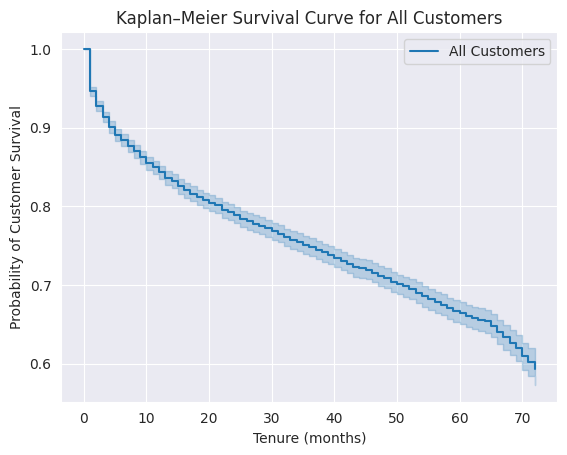

In [109]:
"""
Kaplan–Meier Survival Analysis for Customer Churn

This section fits a Kaplan–Meier estimator to the entire customer dataset.
The Kaplan–Meier method estimates the probability of customer retention
(survival) over time, accounting for customers who have not yet churned
as censored observations.

The resulting curve shows how the likelihood of a customer remaining
with the company decreases as tenure increases.
"""

# =====================================================================
# Fit and plot the Kaplan–Meier survival curve
# =====================================================================

# Initialize Kaplan–Meier fitter object
kmf = KaplanMeierFitter()

# Fit the model using tenure as time and churn as the event indicator
kmf.fit(timevar, event_observed=eventvar, label="All Customers")

# Plot the survival function
kmf.plot()

# Customize plot labels and title
plt.ylabel("Probability of Customer Survival")
plt.xlabel("Tenure (months)")
plt.title("Kaplan–Meier Survival Curve for All Customers")
plt.show()


## Log Rank Test

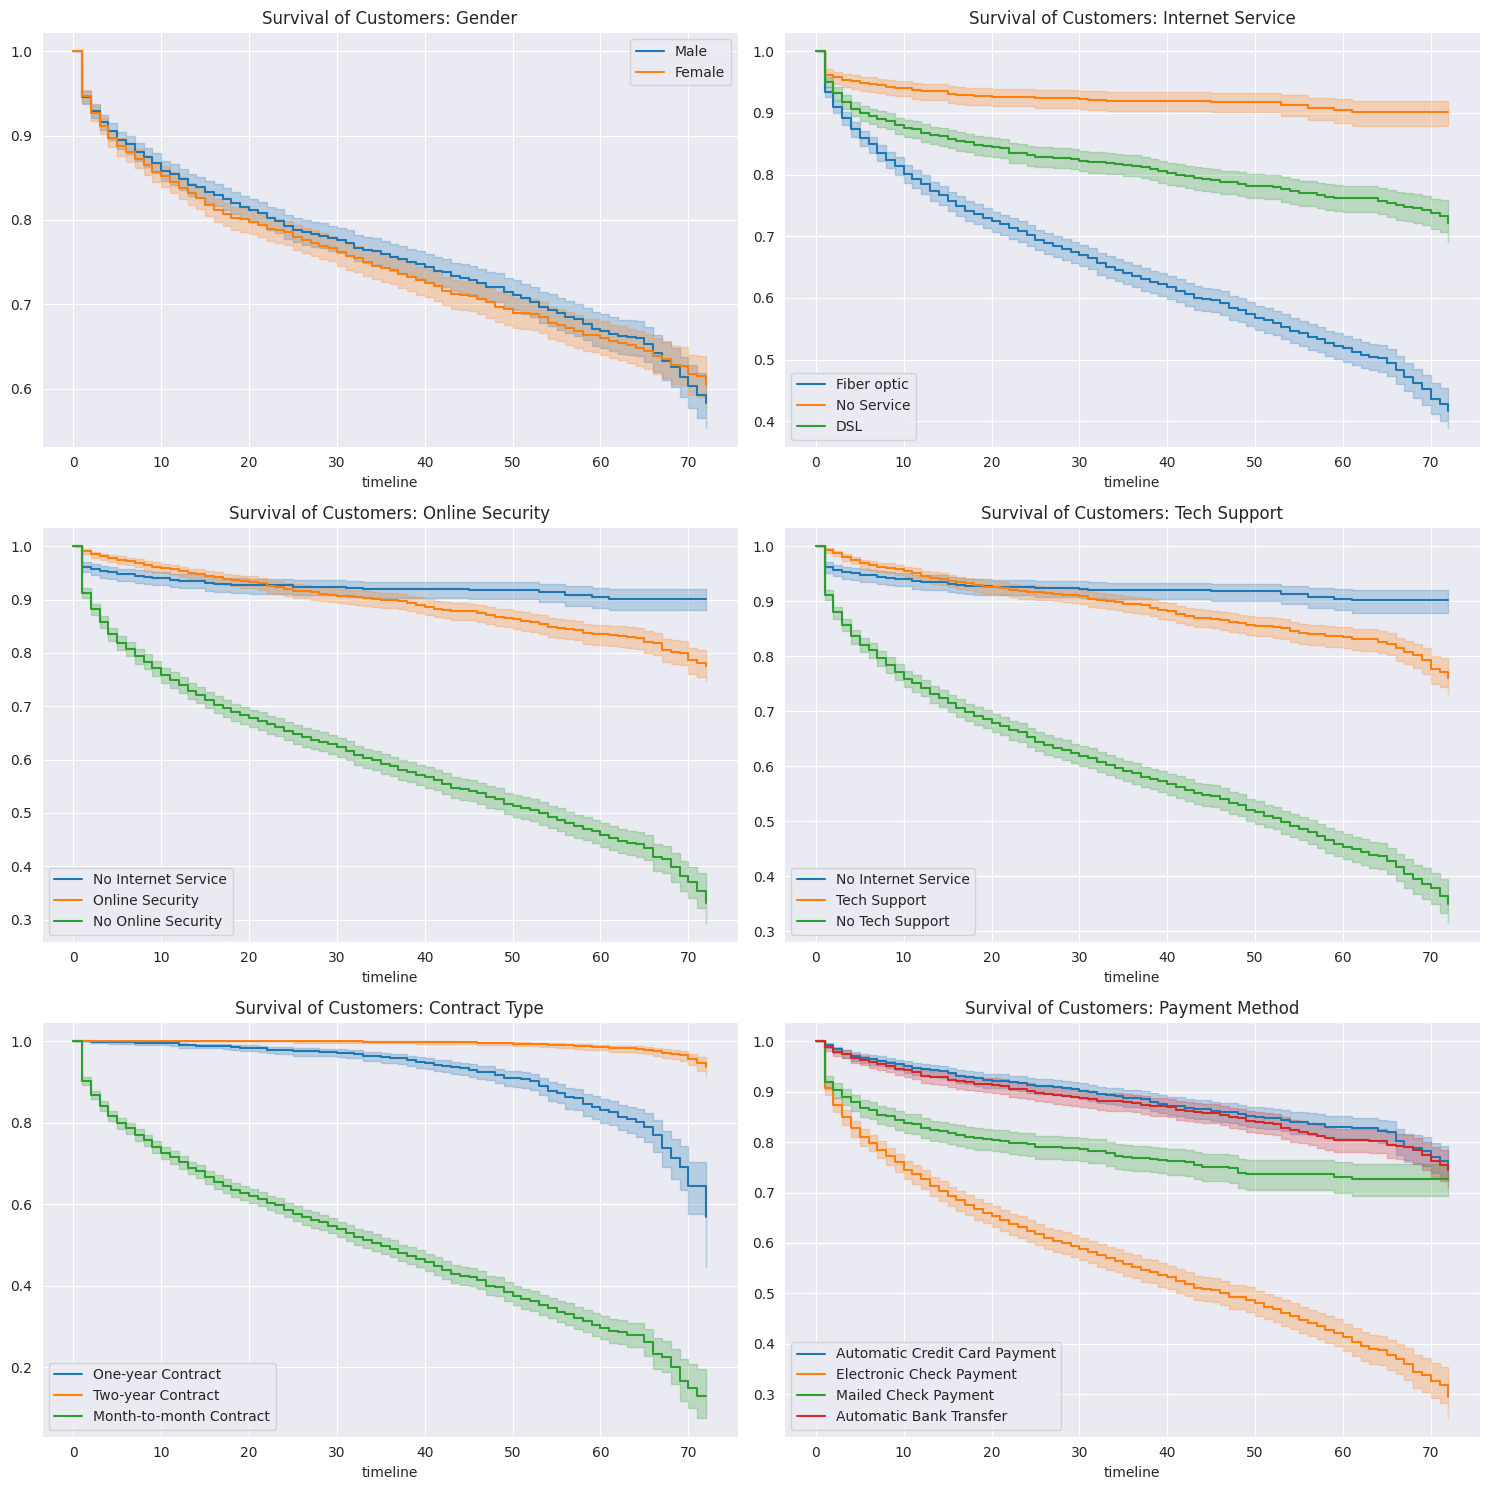

In [110]:
"""
Kaplan–Meier Survival Curves by Customer Segments

This section compares customer survival probabilities across multiple
subgroups such as gender, internet service type, online security,
tech support, contract type, and payment method.

Each subplot visualizes how the probability of customer retention changes
over time for a specific feature category.
This helps identify which groups are more prone to churn.
"""

# =====================================================================
# Create subplot grid
# =====================================================================
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# =====================================================================
# 1. Gender-based survival comparison
# =====================================================================
male = (survivaldata['gender_Male'] == 1)
female = (survivaldata['gender_Male'] == 0)

kmf.fit(timevar[male], event_observed=eventvar[male], label="Male")
kmf.plot(ax=axes[0, 0])

kmf.fit(timevar[female], event_observed=eventvar[female], label="Female")
kmf.plot(ax=axes[0, 0])

axes[0, 0].set_title('Survival of Customers: Gender')

# =====================================================================
# 2. Internet service type
# =====================================================================
Fiber_optic = (survivaldata['InternetService_Fiber optic'] == 1)
No_Service = (survivaldata['InternetService_No'] == 1)
DSL = ((survivaldata['InternetService_Fiber optic'] == 0) &
       (survivaldata['InternetService_No'] == 0))

kmf.fit(timevar[Fiber_optic], event_observed=eventvar[Fiber_optic], label="Fiber optic")
kmf.plot(ax=axes[0, 1])

kmf.fit(timevar[No_Service], event_observed=eventvar[No_Service], label="No Service")
kmf.plot(ax=axes[0, 1])

kmf.fit(timevar[DSL], event_observed=eventvar[DSL], label="DSL")
kmf.plot(ax=axes[0, 1])

axes[0, 1].set_title('Survival of Customers: Internet Service')

# =====================================================================
# 3. Online security
# =====================================================================
no_internetService = (survivaldata['OnlineSecurity_No internet service'] == 1)
onlineSecurity = (survivaldata['OnlineSecurity_Yes'] == 1)
no_onlineSecurity = ((survivaldata['OnlineSecurity_No internet service'] == 0) &
                     (survivaldata['OnlineSecurity_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[1, 0])

kmf.fit(timevar[onlineSecurity], event_observed=eventvar[onlineSecurity], label="Online Security")
kmf.plot(ax=axes[1, 0])

kmf.fit(timevar[no_onlineSecurity], event_observed=eventvar[no_onlineSecurity], label="No Online Security")
kmf.plot(ax=axes[1, 0])

axes[1, 0].set_title('Survival of Customers: Online Security')

# =====================================================================
# 4. Tech support availability
# =====================================================================
no_internetService = (survivaldata['TechSupport_No internet service'] == 1)
TechSupport = (survivaldata['TechSupport_Yes'] == 1)
no_TechSupport = ((survivaldata['TechSupport_No internet service'] == 0) &
                  (survivaldata['TechSupport_Yes'] == 0))

kmf.fit(timevar[no_internetService], event_observed=eventvar[no_internetService], label="No Internet Service")
kmf.plot(ax=axes[1, 1])

kmf.fit(timevar[TechSupport], event_observed=eventvar[TechSupport], label="Tech Support")
kmf.plot(ax=axes[1, 1])

kmf.fit(timevar[no_TechSupport], event_observed=eventvar[no_TechSupport], label="No Tech Support")
kmf.plot(ax=axes[1, 1])

axes[1, 1].set_title('Survival of Customers: Tech Support')

# =====================================================================
# 5. Contract type
# =====================================================================
Contract_One_year = (survivaldata['Contract_One year'] == 1)
Contract_Two_year = (survivaldata['Contract_Two year'] == 1)
Contract_month_to_month = ((survivaldata['Contract_One year'] == 0) &
                           (survivaldata['Contract_Two year'] == 0))

kmf.fit(timevar[Contract_One_year], event_observed=eventvar[Contract_One_year], label="One-year Contract")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[Contract_Two_year], event_observed=eventvar[Contract_Two_year], label="Two-year Contract")
kmf.plot(ax=axes[2, 0])

kmf.fit(timevar[Contract_month_to_month], event_observed=eventvar[Contract_month_to_month], label="Month-to-month Contract")
kmf.plot(ax=axes[2, 0])

axes[2, 0].set_title('Survival of Customers: Contract Type')

# =====================================================================
# 6. Payment method
# =====================================================================
automatic_Credit_Card = (survivaldata['PaymentMethod_Credit card (automatic)'] == 1)
electronic_check = (survivaldata['PaymentMethod_Electronic check'] == 1)
mailed_check = (survivaldata['PaymentMethod_Mailed check'] == 1)
automatic_Bank_Transfer = ((survivaldata['PaymentMethod_Credit card (automatic)'] == 0) &
                           (survivaldata['PaymentMethod_Electronic check'] == 0) &
                           (survivaldata['PaymentMethod_Mailed check'] == 0))

kmf.fit(timevar[automatic_Credit_Card], event_observed=eventvar[automatic_Credit_Card], label="Automatic Credit Card Payment")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[electronic_check], event_observed=eventvar[electronic_check], label="Electronic Check Payment")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[mailed_check], event_observed=eventvar[mailed_check], label="Mailed Check Payment")
kmf.plot(ax=axes[2, 1])

kmf.fit(timevar[automatic_Bank_Transfer], event_observed=eventvar[automatic_Bank_Transfer], label="Automatic Bank Transfer")
kmf.plot(ax=axes[2, 1])

axes[2, 1].set_title('Survival of Customers: Payment Method')

# =====================================================================
# Final layout adjustments
# =====================================================================
plt.tight_layout()
plt.show()


## Semi-Parametric Method

In [111]:
"""
Data Preparation Function for Survival Analysis

This function loads and preprocesses the Telco Customer Churn dataset.
It performs column removal, categorical encoding, and one-hot encoding
to prepare the data for survival or churn modeling.

Steps:
1. Load data from the specified CSV file.
2. Drop irrelevant or redundant columns ('customerID', 'TotalCharges').
3. Encode binary categorical variables into 0/1 values.
4. Map service-related columns with multiple categories into binary form.
5. One-hot encode multi-class categorical variables such as InternetService,
   Contract, and PaymentMethod.
6. Return the cleaned and encoded DataFrame.
"""

# =====================================================================
# Data Preparation Function
# =====================================================================

def datapreparation(filepath):
    """
    Load and preprocess the Telco Customer Churn dataset.

    Parameters
    ----------
    filepath : str
        Path to the input CSV file.

    Returns
    -------
    pandas.DataFrame
        Preprocessed DataFrame ready for survival analysis or modeling.
    """

    # Load dataset
    df = pd.read_csv(filepath)

    # Drop non-informative columns
    df.drop(["customerID", "TotalCharges"], axis=1, inplace=True)

    # -----------------------------------------------------------------
    # Encode binary categorical columns: Yes → 1, No → 0
    # -----------------------------------------------------------------
    binary_columns = ['Partner', 'Dependents', 'PaperlessBilling',
                      'Churn', 'PhoneService']
    for col in binary_columns:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    # Encode gender: Male → 0, Female → 1
    df['gender'] = df['gender'].apply(lambda x: 0 if x == "Male" else 1)

    # Encode 'MultipleLines' considering the 'No phone service' category
    df['MultipleLines'] = df['MultipleLines'].map({
        'No phone service': 0,
        'No': 0,
        'Yes': 1
    })

    # -----------------------------------------------------------------
    # Encode service features with multiple possible values
    # -----------------------------------------------------------------
    service_columns = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                       'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in service_columns:
        df[col] = df[col].map({
            'Yes': 1,
            'No internet service': 0,
            'No': 0
        })

    # -----------------------------------------------------------------
    # One-hot encode categorical columns with multiple categories
    # -----------------------------------------------------------------
    multi_category_columns = ['InternetService', 'Contract', 'PaymentMethod']
    df = pd.get_dummies(df, columns=multi_category_columns, drop_first=True)

    # Return the processed dataset
    return df


In [112]:
"""
Execute data preparation and inspect resulting DataFrame.

This section applies the `datapreparation()` function to the Telco Customer Churn dataset
and verifies the structure of the preprocessed DataFrame.

The `info()` method displays column names, data types, and non-null counts,
which helps confirm that:
- Columns were properly encoded into numeric format.
- There are no unexpected missing values.
- The dataset is ready for modeling.
"""

# =====================================================================
# Apply data preparation function
# =====================================================================

# Load and preprocess the dataset using the defined function
regression_df = datapreparation("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# =====================================================================
# Inspect DataFrame structure and types
# =====================================================================

# Display summary information about the processed DataFrame
regression_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [113]:
"""
Fit a Cox Proportional Hazards (CoxPH) model for customer churn analysis.

The CoxPH model estimates the effect of multiple independent variables
(features) on the hazard (churn) rate over time.

This section:
1. Initializes a CoxPHFitter object.
2. Fits the model using 'tenure' as the duration variable (time to churn)
   and 'Churn' as the event variable (1 = churned, 0 = retained).
3. Displays the model summary, including:
   - Coefficients (log hazard ratios)
   - p-values (statistical significance)
   - Confidence intervals
   - Concordance index (model fit metric)
"""

# =====================================================================
# Initialize and fit the Cox Proportional Hazards model
# =====================================================================

# Create CoxPH model instance
cph = CoxPHFitter()

# Fit the model using tenure (time) and churn (event) columns
cph.fit(regression_df, duration_col='tenure', event_col='Churn')

# =====================================================================
# Display model summary
# =====================================================================

# Print the model summary table with coefficients, hazard ratios, and significance levels
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -13884.60
         time fit was run = 2025-10-28 03:22:04 UTC

---
                                       coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                              
gender                                 0.09      1.09      0.05           -0.01            0.18                0.99                1.19
SeniorCitizen                         -0.07      0.93      0.06           -0.18            0.04                0.83                1.04
Partner                               -0.52      0.60      0.06           -0.63           -0.41                0.53                0.66
Dependents                            -0.05      0.95      0.07           -0.19            0.08                0.83                1.08
PhoneService                           0.25      1.29      0.47           -0.67            1.18                0.51                3.25
MultipleLines                         -0.42      0.66      0.13           -0.67           -0.17                0.51                0.84
OnlineSecurity                        -0.61      0.54      0.13           -0.87           -0.35                0.42                0.70
OnlineBackup                          -0.61      0.54      0.13           -0.86           -0.36                0.42                0.69
DeviceProtection                      -0.28      0.75      0.13           -0.53           -0.04                0.59                0.96
TechSupport                           -0.37      0.69      0.13           -0.63           -0.11                0.53                0.90
StreamingTV                            0.04      1.04      0.24           -0.42            0.50                0.66                1.66
StreamingMovies                       -0.05      0.95      0.24           -0.52            0.41                0.60                1.50
PaperlessBilling                       0.18      1.20      0.06            0.07            0.29                1.07                1.34
MonthlyCharges                        -0.01      0.99      0.02           -0.05            0.04                0.95                1.04
InternetService_Fiber optic            0.59      1.80      0.58           -0.54            1.71                0.58                5.55
InternetService_No                    -1.30      0.27      0.59           -2.45           -0.15                0.09                0.86
Contract_One year                     -1.62      0.20      0.09           -1.79           -1.44                0.17                0.24
Contract_Two year                     -3.23      0.04      0.16           -3.56           -2.91                0.03                0.05
PaymentMethod_Credit card (automatic) -0.08      0.92      0.09           -0.26            0.09                0.77                1.10
PaymentMethod_Electronic check         0.59      1.80      0.07            0.45            0.73                1.56                2.07
PaymentMethod_Mailed check             0.57      1.76      0.09            0.39            0.74                1.48                2.09

                                       cmp to      z      p  -log2(p)
covariate                                                            
gender                                   0.00   1.84   0.07      3.93
SeniorCitizen                            0.00  -1.26   0.21      2.27
Partner                                  0.00  -9.40 <0.005     67.30
Dependents                               0.00  -0.78   0.43      1.20
PhoneService                             0.00   0.54   0.59      0.76
MultipleLines   

In [114]:
"""
Evaluate model performance using the concordance index (C-index).

The concordance index measures how well the Cox Proportional Hazards model
predicts the order of events (customer churn).

It ranges from 0 to 1:
- 0.5 → Random prediction (no better than chance)
- 1.0 → Perfect prediction
- Values above ~0.7 indicate good predictive discrimination.
"""

# =====================================================================
# Retrieve and display model performance metric
# =====================================================================

# Extract the concordance index from the fitted CoxPH model
c_index = cph.concordance_index_

# Print the concordance index score
print("Concordance Index (C-index):", round(c_index, 4))


Concordance Index (C-index): 0.8664


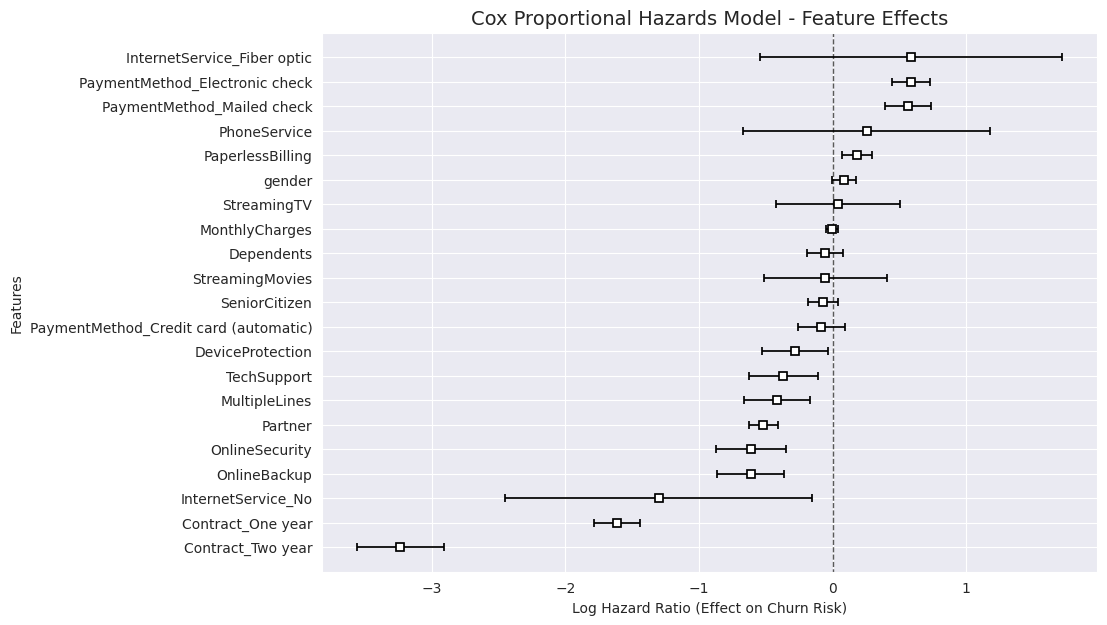

In [115]:
"""
Visualize feature importance using hazard ratios from the CoxPH model.

This plot displays the log hazard ratios (coefficients) estimated by the
Cox Proportional Hazards model for each predictor variable.

Interpretation:
- Positive coefficients (right of 0) increase churn risk (shorter survival time).
- Negative coefficients (left of 0) reduce churn risk (longer survival time).
- The length of the confidence intervals indicates the uncertainty of each estimate.
"""

# =====================================================================
# Plot CoxPH model coefficients (log hazard ratios)
# =====================================================================

# Create figure and axis for the coefficient plot
fig, ax = plt.subplots(figsize=(10, 7))

# Plot model coefficients with 95% confidence intervals
cph.plot(ax=ax)

# Add title and improve readability
ax.set_title("Cox Proportional Hazards Model - Feature Effects", fontsize=14)
ax.set_xlabel("Log Hazard Ratio (Effect on Churn Risk)")
ax.set_ylabel("Features")

# Display the plot
plt.show()


In [116]:
"""
Select a random customer record for testing or prediction.

This step samples one random observation (customer) from the preprocessed dataset.
It can be used later to predict individual survival probability or churn risk
using the fitted Cox Proportional Hazards model.
"""

# =====================================================================
# Random sampling of a single observation
# =====================================================================

# Randomly select one customer from the regression dataset
test_id = regression_df.sample(1)

# Display the sampled record
test_id


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1912,0,0,1,1,44,1,0,0,0,0,...,1,20.5,0,False,True,True,False,False,False,False


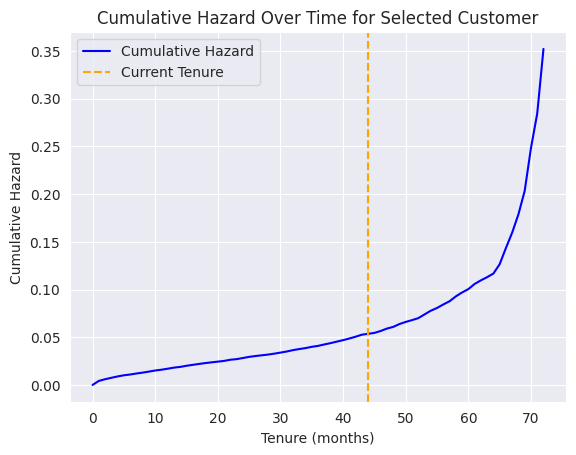

In [117]:
"""
Visualize cumulative hazard over time for a single customer.

This plot shows how the cumulative hazard (risk of churn) evolves
with tenure for a randomly selected customer.

Interpretation:
- The blue curve represents the cumulative hazard function predicted
  by the Cox Proportional Hazards model.
- The orange dashed line indicates the customer’s current tenure.
- A steeper curve suggests a higher risk of churn at that point in time.
"""

# =====================================================================
# Plot cumulative hazard prediction for the selected customer
# =====================================================================

# Create a figure and axis for the plot
fig, ax = plt.subplots()

# Predict cumulative hazard over time using the fitted CoxPH model
cph.predict_cumulative_hazard(test_id).plot(ax=ax, color='blue')

# Mark the customer's current tenure on the plot
plt.axvline(x=test_id.tenure.values[0], color='orange', linestyle='--')

# Add legend and labels
plt.legend(labels=['Cumulative Hazard', 'Current Tenure'])
ax.set_xlabel('Tenure (months)', fontsize=10)
ax.set_ylabel('Cumulative Hazard', fontsize=10)
ax.set_title('Cumulative Hazard Over Time for Selected Customer', fontsize=12)

# Display the plot
plt.show()


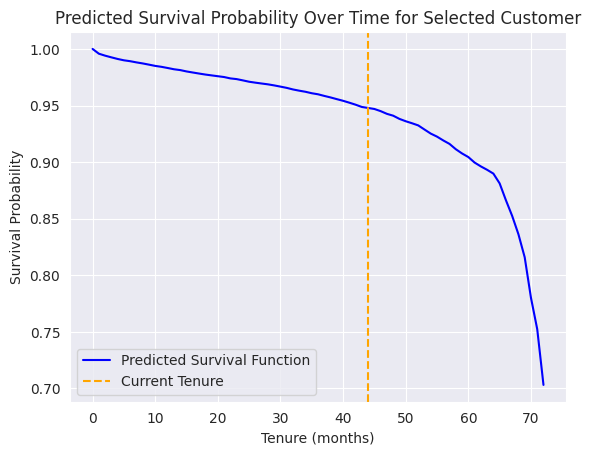

In [118]:
"""
Visualize predicted survival probability over time for a single customer.

This plot shows the survival function estimated by the Cox Proportional Hazards model
for one selected customer. The survival function represents the probability that
the customer will remain with the company (not churn) up to each point in time.

Interpretation:
- The blue curve: Predicted survival probability as tenure increases.
- The orange dashed line: The customer's current tenure.
- The Y-axis shows the probability of remaining active (not churned).
"""

# =====================================================================
# Plot survival function for the selected customer
# =====================================================================

# Create a figure and axis
fig, ax = plt.subplots()

# Predict survival probability using the fitted CoxPH model
cph.predict_survival_function(test_id).plot(ax=ax, color='blue')

# Mark the customer's current tenure on the curve
plt.axvline(x=test_id.tenure.values[0], color='orange', linestyle='--')

# Add legend, axis labels, and title
plt.legend(labels=['Predicted Survival Function', 'Current Tenure'])
ax.set_xlabel('Tenure (months)', fontsize=10)
ax.set_ylabel('Survival Probability', fontsize=10)
ax.set_title('Predicted Survival Probability Over Time for Selected Customer', fontsize=12)

# Display the plot
plt.show()


In [119]:
"""
Estimate Customer Lifetime Value (LTV) using the survival model.

This section combines the predicted survival function from the CoxPH model
with the customer’s monthly charges to estimate their expected lifetime value.

Steps:
1. Predict survival probability over tenure for a given customer.
2. Identify the maximum tenure where survival probability remains above 10%.
3. Estimate Lifetime Value (LTV) as:
       LTV = (Expected active months) × (MonthlyCharges)

Interpretation:
- The resulting value represents the expected future revenue from the customer,
  assuming the survival probability drops below 0.1 (10%) at the end of their lifecycle.
"""

# =====================================================================
# Estimate expected lifetime and compute LTV
# =====================================================================

# Predict survival function for the selected customer and reset index
life = cph.predict_survival_function(test_id).reset_index()
life.columns = ['Tenure', 'Probability']  # Rename columns for clarity

# Determine the last tenure where survival probability is greater than 10%
max_life = life['Tenure'][life['Probability'] > 0.1].max()

# Compute Lifetime Value (LTV)
LTV = max_life * test_id['MonthlyCharges'].values[0]

# Display the calculated LTV
print(f"Estimated Lifetime Value (LTV) of the selected customer: ${LTV:.2f}")


Estimated Lifetime Value (LTV) of the selected customer: $1476.00


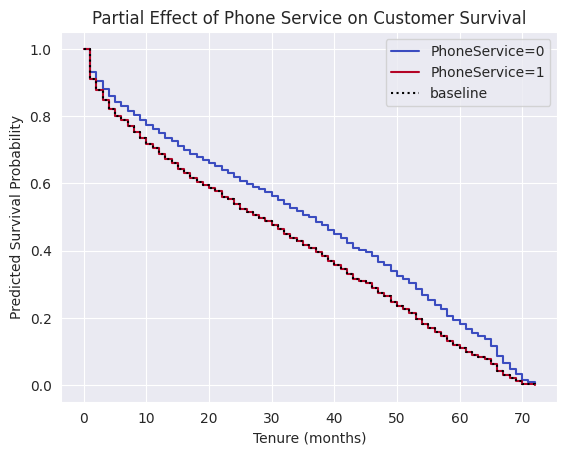

In [120]:
"""
Visualize the partial effect of 'PhoneService' on customer survival.

This plot compares the predicted survival curves for customers
with and without phone service, holding all other variables constant.

The Cox Proportional Hazards model estimates how changes in one feature
('PhoneService') influence the overall survival probability over time.

Interpretation:
- The red and blue curves represent predicted survival functions for
  different values of the 'PhoneService' variable:
    - 0 → No phone service
    - 1 → Has phone service
- The vertical difference between curves reflects the feature’s impact on churn risk.
"""

# =====================================================================
# Plot partial effects of the 'PhoneService' variable
# =====================================================================

# Visualize how survival probability changes when 'PhoneService' = 0 vs. 1
cph.plot_partial_effects_on_outcome(
    covariates='PhoneService',
    values=[0, 1],
    cmap='coolwarm'
)

# Customize labels and title
plt.title("Partial Effect of Phone Service on Customer Survival")
plt.xlabel("Tenure (months)")
plt.ylabel("Predicted Survival Probability")

# Display the plot
plt.show()


In [121]:
"""
Validate the proportional hazards assumption for the CoxPH model.

The Cox Proportional Hazards model assumes that the effect of each covariate
on the hazard (churn risk) is constant over time. This step tests that assumption
using statistical tests and diagnostic plots.

Parameters:
- p_value_threshold=0.05 → Variables with p-values below this threshold
  may violate the proportional hazards assumption.

Outputs:
1. Statistical test results for each covariate.
2. Diagnostic plots for features showing potential violations.

Interpretation:
- If all p-values > 0.05 → The assumption holds (model is valid).
- If any p-value ≤ 0.05 → That variable’s effect changes over time,
  and the model may need stratification or time-varying adjustments.
"""

# =====================================================================
# Check proportional hazards assumption
# =====================================================================

# Perform tests and generate diagnostic plots
cph.check_assumptions(regression_df, p_value_threshold=0.05)


The ``p_value_threshold`` is set at 0.05. Even under the null hypothesis of no violations, some
covariates will be below the threshold by chance. This is compounded when there are many covariates.
Similarly, when there are lots of observations, even minor deviances from the proportional hazard
assumption will be flagged.

With that in mind, it's best to use a combination of statistical tests and visual tests to determine
the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
and looking for non-constant lines. See link [A] below for a full example.



<lifelines.StatisticalResult: proportional_hazard_test>
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                            test_statistic      p  -log2(p)
Contract_One year                     km             54.31 <0.005     42.41
                                      rank           39.61 <0.005     31.59
Contract_Two year                     km             29.74 <0.005     24.27
                                      rank           16.71 <0.005     14.49
Dependents                            km              0.00   0.99      0.02
                                      rank            0.00   0.95      0.07
DeviceProtection                      km              2.31   0.13      2.96
                                      rank            3.72   0.05      4.22
InternetService_Fiber optic           km              0.93   0.33      1.58
                                      rank            1.87   0.17      2.54
InternetService_No                    km              1.33   0.25      2.01
                                      rank            2.23   0.14      2.89
MonthlyCharges                        km              0.58   0.45      1.16
                                      rank            1.35   0.25      2.02
MultipleLines                         km              5.73   0.02      5.91
                                      rank            7.91 <0.005      7.67
OnlineBackup                          km              3.71   0.05      4.21
                                      rank            4.67   0.03      5.03
OnlineSecurity                        km              5.44   0.02      5.67
                                      rank            7.81   0.01      7.59
PaperlessBilling                      km              0.19   0.66      0.59
                                      rank            0.00   0.96      0.05
Partner                               km              3.20   0.07      3.76
                                      rank            4.48   0.03      4.86
PaymentMethod_Credit card (automatic) km              0.56   0.46      1.14
                                      rank            0.68   0.41      1.28
PaymentMethod_Electronic check        km              3.79   0.05      4.27
                                      rank            4.64   0.03      5.00
PaymentMethod_Mailed check            km              6.50   0.01      6.54
                                      rank            8.82 <0.005      8.39
PhoneService                          km              0.77   0.38      1.40
                                      rank            1.61   0.20      2.29
SeniorCitizen                         km              0.01   0.94      0.09
                                      rank            0.03   0.86      0.22
StreamingMovies                       km              2.15   0.14      2.81
                                      rank            3.44   0.06      3.97
StreamingTV                           km              2.60   0.11      3.22
                                      rank            3.98   0.05      4.44
TechSupport                           km              5.82   0.02      5.98
                                      rank            7.88 <0.005      7.65
gender                                km              0.47   0.49      1.02
                                      rank            0.09   0.76      0.39



1. Variable 'Partner' failed the non-proportional test: p-value is 0.0343.

   Advice: with so few unique values (only 2), you can include `strata=['Partner', ...]` in the call
in `.fit`. See documentation in link [E] below.

2. Variable 'MultipleLines' failed the non-proportional test: p-value is 0.0049.

   Advice: with so few unique values (only 2), you can include `strata=['MultipleLines', ...]` in
the call in `.fit`. See documentation in link [E] below.

3. Variable 'OnlineSecurity' failed the non-proportional test: p-value is 0.0052.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineSecurity', ...]` in
the call in `.fit`. See documentation in link [E] below.

4. Variable 'OnlineBackup' failed the non-proportional test: p-value is 0.0306.

   Advice: with so few unique values (only 2), you can include `strata=['OnlineBackup', ...]` in the
call in `.fit`. See documentation in link [E] below.

5. Variable 'DeviceProtection' failed the non-proportional

[]

In [122]:
"""
Perform a formal proportional hazards test for the CoxPH model.

This test statistically verifies whether the proportional hazards (PH) assumption holds
for each covariate in the model. The PH assumption states that hazard ratios remain constant
over time — a key requirement for valid Cox model interpretation.

Method:
- The `proportional_hazard_test` from lifelines computes Schoenfeld residual-based tests
  for each variable using time-transformed residuals.
- The `time_transform='rank'` option ranks time to improve robustness for non-linear patterns.

Interpretation:
- High p-values (p > 0.05): Variable satisfies the PH assumption (good).
- Low p-values (p ≤ 0.05): Variable violates PH assumption (effect changes over time).
"""

# =====================================================================
# Conduct proportional hazards test
# =====================================================================

from lifelines.statistics import proportional_hazard_test

# Run the test on the fitted CoxPH model using ranked time transformation
results = proportional_hazard_test(cph, regression_df, time_transform='rank')

# Display summary of test results with p-values for each variable
results.print_summary(decimals=3, model="untransformed variables")


<lifelines.StatisticalResult: proportional_hazard_test>
    time_transform = rank
 null_distribution = chi squared
degrees_of_freedom = 1
             model = <lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
         test_name = proportional_hazard_test

---
                                       test_statistic      p  -log2(p)
Contract_One year                               39.61 <0.005     31.59
Contract_Two year                               16.71 <0.005     14.49
Dependents                                       0.00   0.95      0.07
DeviceProtection                                 3.72   0.05      4.22
InternetService_Fiber optic                      1.87   0.17      2.54
InternetService_No                               2.23   0.14      2.89
MonthlyCharges                                   1.35   0.25      2.02
MultipleLines                                    7.91 <0.005      7.67
OnlineBackup                                     4.67   0.03      5.03
OnlineSecurity                                   7.81   0.01      7.59
PaperlessBilling                                 0.00   0.96      0.05
Partner                                          4.48   0.03      4.86
PaymentMethod_Credit card (automatic)            0.68   0.41      1.28
PaymentMethod_Electronic check                   4.64   0.03      5.00
PaymentMethod_Mailed check                       8.82 <0.005      8.39
PhoneService                                     1.61   0.20      2.29
SeniorCitizen                                    0.03   0.86      0.22
StreamingMovies                                  3.44   0.06      3.97
StreamingTV                                      3.98   0.05      4.44
TechSupport                                      7.88 <0.005      7.65
gender                                           0.09   0.76      0.39

In [123]:
"""
Check for multicollinearity using Variance Inflation Factor (VIF).

Multicollinearity occurs when independent variables in a regression or Cox model
are highly correlated, which can distort coefficient estimates and reduce model stability.

This block:
1. Encodes categorical variables into dummy variables.
2. Ensures all predictors are numeric and free from constants or NaNs.
3. Computes the VIF for each feature to identify potential collinearity.

Interpretation:
- VIF ≈ 1 → No multicollinearity.
- 1 < VIF < 5 → Moderate correlation (usually acceptable).
- VIF ≥ 10 → High multicollinearity; consider removing or combining variables.
"""

# =====================================================================
# Step 1: One-hot encode categorical features
# =====================================================================
X = pd.get_dummies(regression_df.drop(['Churn', 'tenure'], axis=1), drop_first=True)

# =====================================================================
# Step 2: Convert booleans to integers (True→1, False→0)
# =====================================================================
X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))

# =====================================================================
# Step 3: Ensure all data are numeric (coerce invalids to NaN)
# =====================================================================
X = X.apply(pd.to_numeric, errors='coerce')

# =====================================================================
# Step 4: Drop constant or all-NaN columns
# =====================================================================
X = X.dropna(axis=1, how='all')   # Remove columns that are entirely NaN
X = X.loc[:, X.std() > 0]         # Remove columns with zero variance

# =====================================================================
# Step 5: Optionally drop any rows with NaN
# =====================================================================
X = X.dropna()

# =====================================================================
# Step 6: Compute Variance Inflation Factor (VIF)
# =====================================================================
def calc_vif(X: pd.DataFrame) -> pd.DataFrame:
    """
    Calculate the Variance Inflation Factor for each feature.

    Parameters
    ----------
    X : pd.DataFrame
        A numeric DataFrame containing only the independent variables.

    Returns
    -------
    pd.DataFrame
        DataFrame listing each feature and its corresponding VIF value.
    """
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [
        variance_inflation_factor(X.values.astype(float), i)
        for i in range(X.shape[1])
    ]
    return vif

# Generate and sort VIF results
feature_vif = calc_vif(X)
feature_vif.sort_values('VIF')


/tmp/ipython-input-1907039759.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 1 if x is True else (0 if x is False else x))


,Variable,VIF
1,SeniorCitizen,1.372581
16,Contract_One year,1.739353
3,Dependents,1.969665
0,gender,1.978859
18,PaymentMethod_Credit card (automatic),1.982442
20,PaymentMethod_Mailed check,2.278200
6,OnlineSecurity,2.403541
7,OnlineBackup,2.486137
17,Contract_Two year,2.486945
9,TechSupport,2.501654


In [124]:
"""
Select independent variables with acceptable multicollinearity.

This step filters out features with high Variance Inflation Factor (VIF) values
to ensure model stability. Features with VIF ≥ 10 are considered highly collinear
and are excluded from further modeling.

After filtering:
- Remaining variables (`features_keep`) will be used in survival analysis.
- We also append the time (`time`) and event (`status`) columns, which are
  required for Cox Proportional Hazards modeling.
"""

# =====================================================================
# Step 1: Filter features based on VIF threshold
# =====================================================================
# Keep only variables with VIF less than 10
features_keep = feature_vif.loc[feature_vif['VIF'] < 10, 'Variable'].tolist()

# =====================================================================
# Step 2: Add required survival analysis columns
# =====================================================================
# Append time and event columns for use in survival models
features_keep.extend(['time', 'status'])

# Display the final list of retained features
features_keep


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'InternetService_No',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'time',
 'status']

## Penalized Cox Model

In [125]:
"""
Install the scikit-survival package.

`scikit-survival` is a Python library built on top of scikit-learn
for survival analysis — modeling time-to-event data such as
customer churn duration, equipment failure, or patient survival time.

It provides models including:
- Cox Proportional Hazards (CoxPHSurvivalAnalysis)
- Random Survival Forests
- Survival Support Vector Machines
- Gradient Boosting for survival data

Note:
- Installation may take several minutes due to required C/C++ dependencies.
- Run this command once per Colab session before importing from `sksurv`.
"""

# =====================================================================
# Install the scikit-survival library
# =====================================================================
!pip install scikit-survival


In [126]:
"""
Import required libraries and configure the environment for survival modeling.

This section sets up the workflow for building and tuning Cox Proportional Hazards models
using the `scikit-survival` library. It includes key imports for data preprocessing,
modeling, and visualization.

Libraries and Purpose:
- matplotlib.pyplot: Visualization of survival curves and model diagnostics.
- sksurv.linear_model:
    * CoxPHSurvivalAnalysis: Traditional Cox model.
    * CoxnetSurvivalAnalysis: Regularized (Lasso/Ridge) Cox model for feature selection.
- sksurv.preprocessing.OneHotEncoder: Encodes categorical variables for survival models.
- sklearn modules:
    * GridSearchCV: Hyperparameter tuning via cross-validation.
    * KFold: Stratified splitting for model evaluation.
    * make_pipeline: Chaining preprocessing and modeling steps.
    * StandardScaler: Standardizes numerical features.
- set_config(display="text"): Ensures that pipeline steps are displayed clearly in text form.

Note:
- `%matplotlib inline` ensures plots are displayed directly in the notebook.
- This setup supports both baseline and regularized Cox models using consistent preprocessing.
"""

# =====================================================================
# Import core packages
# =====================================================================
import matplotlib.pyplot as plt
%matplotlib inline

# Survival modeling and preprocessing from scikit-survival
from sksurv.linear_model import CoxPHSurvivalAnalysis, CoxnetSurvivalAnalysis
from sksurv.preprocessing import OneHotEncoder

# Scikit-learn utilities for model tuning and scaling
from sklearn import set_config
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Display sklearn pipeline steps as readable text
set_config(display="text")


In [127]:
"""
Extract key survival variables from the preprocessed dataset.

These two variables represent the fundamental components of survival analysis:
- `tenure`: The time-to-event variable (in months). Represents how long each customer has stayed.
- `churn`: The event indicator (1 = customer churned, 0 = still active).

Both are essential for constructing the structured survival dataset
used by `scikit-survival` models such as `CoxPHSurvivalAnalysis`.
"""

# =====================================================================
# Define time-to-event and event indicator variables
# =====================================================================

# Duration variable: how long the customer remained before churn or censoring
tenure = regression_df['tenure']

# Event variable: whether the customer churned (1) or not (0)
churn = regression_df['Churn']


In [128]:
"""
Prepare the feature matrix (X) for survival modeling.

This step removes columns that should not be included as predictors
in the Cox model. These are either target variables or variables that
could lead to data leakage or redundancy.

Dropped columns:
- 'tenure' → The time-to-event variable (used separately as duration).
- 'Churn' → The event indicator (target variable).
- 'MonthlyCharges' & 'TotalCharges' → Potentially collinear with other predictors
  and directly related to customer tenure or contract type.

The remaining columns form the feature matrix `X`, which will be used
to train the Cox Proportional Hazards model.
"""

# =====================================================================
# Prepare feature set for modeling
# =====================================================================

# Copy the regression dataframe to preserve original data
X = regression_df.copy()

# Drop target and leakage-related columns
X.drop(
    ['tenure', 'Churn', 'MonthlyCharges', 'TotalCharges'],
    axis=1,
    inplace=True,
    errors='ignore'   # Ignores missing columns safely
)


In [129]:
"""
Encode categorical variables for Cox model training.

The `scikit-survival` library requires all model inputs to be numeric.
This step converts categorical features (e.g., Contract type, InternetService,
PaymentMethod) into one-hot encoded (binary) form using `OneHotEncoder`.

Steps:
1. `OneHotEncoder()` automatically detects categorical columns and encodes them.
2. `fit_transform(X)` learns the category mappings and transforms the data.
3. The resulting `Xt` is a purely numeric feature matrix ready for modeling.

Note:
- One-hot encoding avoids imposing ordinal relationships between categories.
- Rounding to 2 decimals (`round(2)`) is just for display purposes.
"""

# =====================================================================
# Step: One-hot encode categorical features
# =====================================================================

# Apply one-hot encoding to convert categorical variables into numeric columns
Xt = OneHotEncoder().fit_transform(X)

# Display the first few rows, rounded for readability
Xt.round(2).head()


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,0,0,1,0,0,0,0,1,False,False,False,False,False,True,False
1,0,0,0,0,1,0,1,0,1,0,0,0,0,False,False,True,False,False,False,True
2,0,0,0,0,1,0,1,1,0,0,0,0,1,False,False,False,False,False,False,True
3,0,0,0,0,0,0,1,0,1,1,0,0,0,False,False,True,False,False,False,False
4,1,0,0,0,1,0,0,0,0,0,0,0,1,True,False,False,False,False,True,False


In [130]:
"""
Create a structured survival array compatible with scikit-survival.

`scikit-survival` expects the target variable (`y`) to be a structured NumPy array
with two named fields:
- 'event' (or 'churn'): A boolean indicator of whether the event (customer churn) occurred.
- 'time' (or 'tenure'): A float representing the time to event or censoring.

This format allows the library to distinguish between event occurrence and duration
for each observation.

Example of structured record:
( churn=True, tenure=5.0 )

Steps:
1. Initialize an empty structured array with the appropriate data types.
2. Populate it with the churn and tenure values from the dataset.
"""

# =====================================================================
# Step: Build structured survival array
# =====================================================================

# Initialize an empty structured array with proper data types
structured_array = np.empty(
    (len(churn),),
    dtype=[('churn', bool), ('tenure', float)]
)

# Assign event and time values
structured_array['churn'] = churn.astype(bool)   # Event indicator (True = churned)
structured_array['tenure'] = tenure.astype(float)  # Duration variable (in months)


## RIDGE

In [131]:
"""
Tune the Cox Proportional Hazards model across different regularization strengths (alpha).

This loop evaluates how varying the regularization parameter (`alpha`)
affects the model’s feature coefficients. Regularization helps reduce
overfitting and manage correlated predictors by penalizing large coefficients.

Steps:
1. Define a range of alpha values on a logarithmic scale.
2. Fit the Cox Proportional Hazards model (`CoxPHSurvivalAnalysis`) for each alpha.
3. Store the resulting coefficients in a dictionary keyed by alpha.
4. Convert the dictionary to a tidy pandas DataFrame for easy visualization.

Interpretation:
- Small alpha → less regularization (potential overfitting).
- Large alpha → stronger regularization (coefficients shrink toward zero).
- Tracking coefficient paths across alphas helps identify stable, influential predictors.
"""

# =====================================================================
# Step 1: Define alpha range for regularization tuning
# =====================================================================
y = structured_array  # Target variable for survival analysis
alphas = 10. ** np.linspace(-4, 4, 50)  # Logarithmic scale: 1e-4 → 1e4
coefficients = {}  # Dictionary to store coefficient vectors

# =====================================================================
# Step 2: Train Cox model across alphas
# =====================================================================
cph = CoxPHSurvivalAnalysis()

for alpha in alphas:
    cph.set_params(alpha=alpha)  # Set regularization strength
    cph.fit(Xt, y)               # Fit model on encoded feature matrix
    key = round(alpha, 5)        # Round alpha for clean DataFrame indexing
    coefficients[key] = cph.coef_  # Store coefficients for this alpha

# =====================================================================
# Step 3: Convert results to DataFrame
# =====================================================================
coefficients = (
    pd.DataFrame.from_dict(coefficients)
    .rename_axis(index="feature", columns="alpha")
    .set_index(Xt.columns)
)


In [132]:
def plot_coefficients(coefs: pd.DataFrame, n_highlight: int):
    """
    Plot coefficient paths across regularization strengths (alpha).

    This function visualizes how the estimated coefficients of the
    Cox Proportional Hazards model change as the regularization
    parameter (`alpha`) varies. It helps identify stable and
    influential predictors under different levels of penalization.

    Parameters
    ----------
    coefs : pd.DataFrame
        DataFrame where rows correspond to features and columns
        correspond to alpha values. Each cell contains the
        coefficient value estimated for that (feature, alpha) pair.
    n_highlight : int
        Number of top features (by absolute coefficient magnitude
        at the smallest alpha) to label on the plot.

    Interpretation
    --------------
    - Lines: Coefficient trajectories as alpha increases.
    - X-axis: Regularization strength (log scale).
    - Y-axis: Coefficient values.
    - Text labels: Top `n_highlight` features at the weakest regularization.
    """

    # =====================================================================
    # Step 1: Initialize plot
    # =====================================================================
    _, ax = plt.subplots(figsize=(9, 6))
    n_features = coefs.shape[0]
    alphas = coefs.columns  # List of regularization strengths (alpha values)

    # =====================================================================
    # Step 2: Plot coefficient trajectories
    # =====================================================================
    for row in coefs.itertuples():
        ax.semilogx(alphas, row[1:], ".-", label=row.Index)  # log-scale X-axis

    # =====================================================================
    # Step 3: Highlight top features at lowest alpha
    # =====================================================================
    alpha_min = alphas.min()  # Smallest regularization (least shrinkage)
    top_coefs = coefs.loc[:, alpha_min].map(abs).sort_values().tail(n_highlight)

    for name in top_coefs.index:
        coef = coefs.loc[name, alpha_min]
        plt.text(
            alpha_min, coef, name + "   ",
            horizontalalignment="right",
            verticalalignment="center"
        )

    # =====================================================================
    # Step 4: Style and label the plot
    # =====================================================================
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.set_xlabel("Regularization Strength (alpha)")
    ax.set_ylabel("Coefficient Value")
    ax.set_title("Coefficient Paths Across Regularization Levels", fontsize=12)

    plt.tight_layout()
    plt.show()


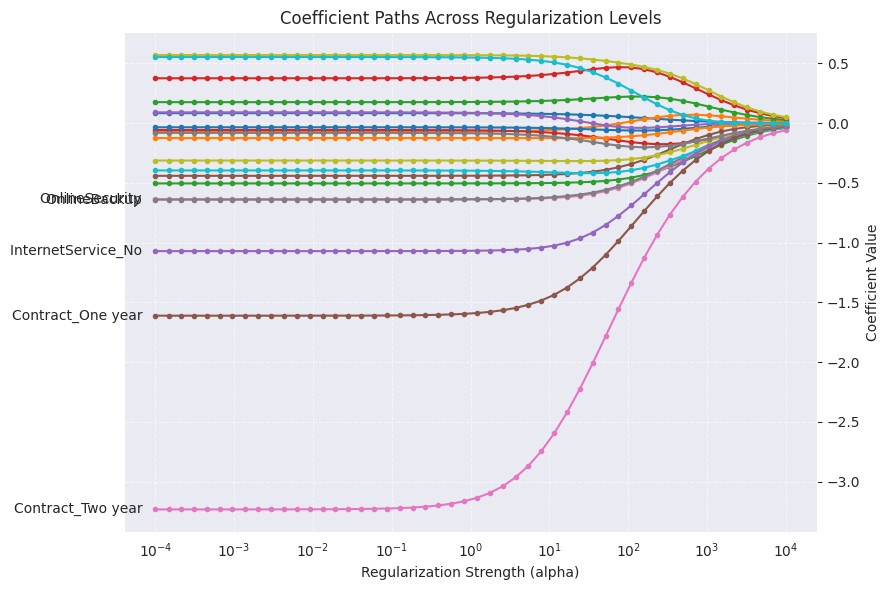

In [133]:
"""
Visualize the top feature coefficient paths across regularization strengths.

This plot displays how the estimated Cox model coefficients evolve as the
regularization parameter (`alpha`) changes. Each line represents one feature’s
coefficient trajectory across varying penalization strengths.

Parameters:
- coefficients : DataFrame of model coefficients across alphas.
- n_highlight : Number of top features (by magnitude) to label at the lowest alpha.

Interpretation:
- Curves that remain large (positive or negative) indicate strong, stable predictors.
- Coefficients shrinking toward zero with increasing alpha reflect features
  whose influence weakens under stronger regularization.
"""

# =====================================================================
# Plot top 5 most influential feature paths
# =====================================================================
plot_coefficients(coefficients, n_highlight=5)


## LASSO

In [134]:
"""
Train a Lasso-regularized Cox Proportional Hazards model.

This model (`CoxnetSurvivalAnalysis`) extends the traditional Cox model by
adding L1 (Lasso) regularization, which encourages sparsity — effectively
selecting the most influential features and shrinking irrelevant ones to zero.

Parameters:
- l1_ratio=1.0 → Pure Lasso penalty (L1 regularization).
  (If set between 0 and 1, it mixes L1 and L2 penalties — Elastic Net.)
- alpha_min_ratio=0.01 → Defines the smallest alpha as a fraction of the maximum.
  Smaller values allow finer control over the regularization path.

Inputs:
- Xt : One-hot encoded and scaled feature matrix.
- y  : Structured survival array (time + event).

Output:
- `cox_lasso` : Fitted Lasso-regularized Cox model ready for coefficient inspection,
  survival predictions, or validation (e.g., via concordance index).
"""

# =====================================================================
# Train a Lasso-regularized Cox Proportional Hazards model
# =====================================================================
cox_lasso = CoxnetSurvivalAnalysis(
    l1_ratio=1.0,         # L1 penalty (Lasso)
    alpha_min_ratio=0.01  # Minimum alpha fraction for the regularization path
)

# Fit the model to encoded features and structured survival data
cox_lasso.fit(Xt, y)


CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=1.0)

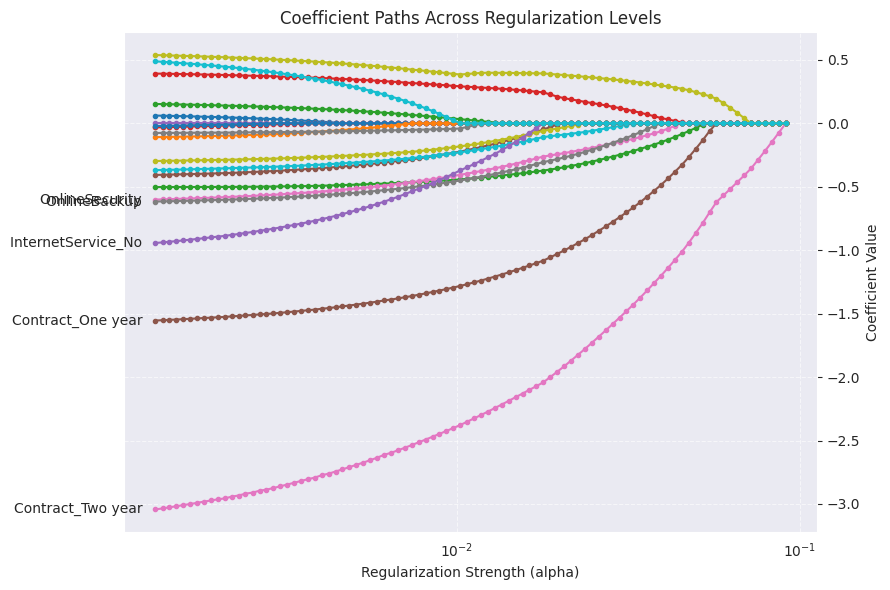

In [135]:
"""
Visualize the coefficient paths of the Lasso-regularized Cox model.

This step creates a DataFrame of coefficients estimated by the
Lasso-regularized Cox model (`CoxnetSurvivalAnalysis`) across a
range of regularization strengths (alpha values) and plots them
to observe how features behave under increasing penalization.

Steps:
1. Extract coefficient paths (`coef_`) and corresponding alphas from the trained model.
2. Create a pandas DataFrame for readability and plotting.
3. Use the previously defined `plot_coefficients()` function to visualize the top features.

Interpretation:
- X-axis (log scale): Regularization strength (alpha).
- Y-axis: Coefficient values for each feature.
- Each line: One feature’s trajectory across alphas.
- The most stable, nonzero features at high alphas are the strongest predictors of churn.
"""

# =====================================================================
# Step 1: Create a coefficient DataFrame from the fitted Lasso model
# =====================================================================
coefficients_lasso = pd.DataFrame(
    cox_lasso.coef_,                      # Coefficient values across alphas
    index=Xt.columns,                     # Feature names
    columns=np.round(cox_lasso.alphas_, 5)  # Regularization strengths (rounded for clarity)
)

# =====================================================================
# Step 2: Visualize the top 5 feature coefficient paths
# =====================================================================
plot_coefficients(coefficients_lasso, n_highlight=5)


## Choosing Alpha

In [136]:
"""
Build and train a regularized Cox Proportional Hazards model using a Scikit-learn pipeline.

This implementation wraps the Lasso/Elastic Net Cox model (`CoxnetSurvivalAnalysis`)
inside a scikit-learn `Pipeline` for consistent preprocessing, regularization, and fitting.

Steps:
1. **Standardize features** — using `StandardScaler` ensures that all predictors
   are on a comparable scale, which is critical for regularized models.
2. **Apply Elastic Net regularization** — controlled via `l1_ratio`:
      - l1_ratio=1.0 → pure Lasso (L1)
      - l1_ratio=0.0 → pure Ridge (L2)
      - l1_ratio=0.9 → mostly Lasso with slight Ridge penalty for stability
3. **Suppress warnings** from convergence or failed fits for cleaner outputs in iterative runs.

Parameters:
- l1_ratio=0.9: Balance between feature selection (L1) and coefficient shrinkage (L2).
- alpha_min_ratio=0.01: Sets the smallest regularization strength tested.
- max_iter=100: Controls optimization iterations (increase if convergence warnings appear).

Inputs:
- Xt : One-hot encoded and numeric feature matrix.
- y  : Structured survival array (time and event data).

Output:
- coxnet_pipe : A trained pipeline object that includes both the scaler and the regularized Cox model.
"""

# =====================================================================
# Import necessary utilities and suppress non-critical warnings
# =====================================================================
import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# =====================================================================
# Step 1: Define preprocessing + model pipeline
# =====================================================================
coxnet_pipe = make_pipeline(
    StandardScaler(),  # Standardize features for better numerical stability
    CoxnetSurvivalAnalysis(
        l1_ratio=0.9,          # Elastic Net regularization (mostly L1)
        alpha_min_ratio=0.01,  # Minimum alpha ratio in the regularization path
        max_iter=100           # Number of optimization iterations
    )
)

# =====================================================================
# Step 2: Suppress expected warnings for smooth model fitting
# =====================================================================
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FitFailedWarning)

# =====================================================================
# Step 3: Fit the pipeline to the encoded features and structured survival data
# =====================================================================
coxnet_pipe.fit(Xt, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('coxnetsurvivalanalysis',
                 CoxnetSurvivalAnalysis(alpha_min_ratio=0.01, l1_ratio=0.9,
                                        max_iter=100))])

In [137]:
"""
Perform cross-validation to identify the optimal regularization strength (alpha)
for the Elastic Net–regularized Cox model.

This procedure evaluates the model’s predictive performance across multiple
regularization strengths using K-fold cross-validation.

Steps:
1. Extract the list of alphas estimated during model fitting.
2. Define a 5-fold cross-validation strategy (randomized and shuffled for robustness).
3. Use `GridSearchCV` to evaluate performance for each alpha value.
4. Aggregate the results into a DataFrame (`cv_results`) for analysis and visualization.

Parameters:
- l1_ratio=0.9 → Elastic Net regularization (mostly L1, slightly L2).
- error_score=0.5 → Assigns a default score to failed fits instead of halting execution.
- n_jobs=1 → Uses a single CPU core (can be increased for parallelization).

Outputs:
- `gcv` : Fitted GridSearchCV object containing best model and performance scores.
- `cv_results` : DataFrame summarizing cross-validation metrics for all alpha values.

Evaluation Metric:
- The default scoring for `CoxnetSurvivalAnalysis` is the **concordance index (C-index)**,
  which measures the model’s ability to correctly rank survival times.
"""

# =====================================================================
# Step 1: Extract alphas estimated from the previous model
# =====================================================================
estimated_alphas = coxnet_pipe.named_steps["coxnetsurvivalanalysis"].alphas_

# =====================================================================
# Step 2: Define cross-validation scheme
# =====================================================================
cv = KFold(
    n_splits=5,          # 5-fold cross-validation
    shuffle=True,        # Shuffle for randomness
    random_state=0       # Ensure reproducibility
)

# =====================================================================
# Step 3: Set up grid search across alpha values
# =====================================================================
gcv = GridSearchCV(
    make_pipeline(
        StandardScaler(),
        CoxnetSurvivalAnalysis(l1_ratio=0.9)
    ),
    param_grid={"coxnetsurvivalanalysis__alphas": [[v] for v in estimated_alphas]},  # Test each alpha value
    cv=cv,
    error_score=0.5,     # Assign score for failed fits instead of stopping
    n_jobs=1             # Single-threaded for Colab stability
).fit(Xt, y)

# =====================================================================
# Step 4: Convert cross-validation results into a DataFrame
# =====================================================================
cv_results = pd.DataFrame(gcv.cv_results_)


In [138]:
"""
Extract and organize cross-validation results for model performance visualization.

This step isolates the tested alpha values (regularization strengths) and their
corresponding cross-validated performance metrics from the `cv_results` DataFrame
returned by GridSearchCV.

Steps:
1. Extract each alpha value from the parameter grid.
2. Retrieve the mean and standard deviation of the test scores
   (typically the concordance index) across folds.

Outputs:
- `alphas` : List of regularization strengths tested (floats).
- `mean`   : Mean C-index score for each alpha across 5 folds.
- `std`    : Standard deviation of the C-index across folds,
             reflecting model stability and variance.
"""

# =====================================================================
# Step 1: Extract alpha values from parameter grid
# =====================================================================
alphas = cv_results.param_coxnetsurvivalanalysis__alphas.map(lambda x: x[0])

# =====================================================================
# Step 2: Retrieve average and standard deviation of CV scores
# =====================================================================
mean = cv_results.mean_test_score
std = cv_results.std_test_score


Number of non-zero coefficients: 20


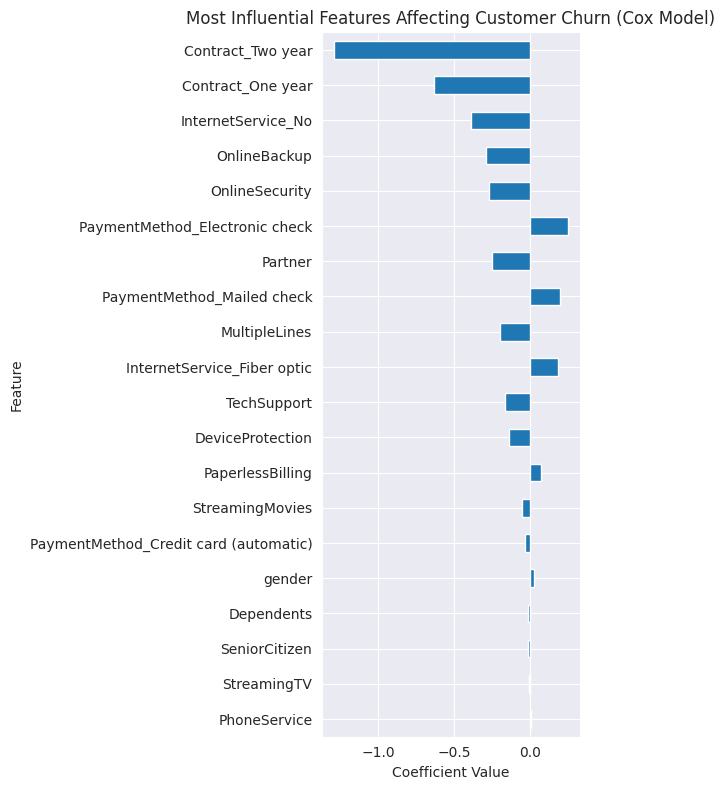

In [139]:
"""
Extract and visualize the most influential features from the best-performing Cox model.

This step identifies which predictors remain active (non-zero coefficients)
in the best model after regularization and visualizes their relative influence
on customer churn survival time.

Steps:
1. Retrieve the best estimator (model) from the cross-validation search.
2. Extract and store all feature coefficients.
3. Identify non-zero coefficients — features retained by the regularized model.
4. Sort by absolute coefficient magnitude to visualize the strongest predictors.

Outputs:
- `best_coefs` : DataFrame of all feature coefficients.
- `non_zero_coefs` : Filtered DataFrame containing only active (non-zero) features.
- Horizontal bar plot visualizing feature influence.

Interpretation:
- Positive coefficients → increase the hazard (higher churn risk, shorter survival).
- Negative coefficients → decrease the hazard (lower churn risk, longer retention).
- Features closer to zero are weak or uninformative predictors (shrunk out by Lasso).
"""

# =====================================================================
# Step 1: Extract the best fitted model from cross-validation
# =====================================================================
best_model = gcv.best_estimator_.named_steps["coxnetsurvivalanalysis"]

# =====================================================================
# Step 2: Create a DataFrame of feature coefficients
# =====================================================================
best_coefs = pd.DataFrame(
    best_model.coef_,
    index=Xt.columns,
    columns=["coefficient"]
)

# =====================================================================
# Step 3: Identify non-zero coefficients (active predictors)
# =====================================================================
non_zero = np.sum(best_coefs.iloc[:, 0] != 0)
print(f"Number of non-zero coefficients: {non_zero}")

non_zero_coefs = best_coefs.query("coefficient != 0")

# =====================================================================
# Step 4: Sort features by magnitude for clear visualization
# =====================================================================
coef_order = non_zero_coefs.abs().sort_values("coefficient").index

# =====================================================================
# Step 5: Plot the coefficients
# =====================================================================
_, ax = plt.subplots(figsize=(6, 8))
non_zero_coefs.loc[coef_order].plot.barh(ax=ax, legend=False)
ax.set_xlabel("Coefficient Value")
ax.set_ylabel("Feature")
ax.set_title("Most Influential Features Affecting Customer Churn (Cox Model)")
ax.grid(True)
plt.tight_layout()
plt.show()


# AFT

In [140]:
"""
Import core data processing and visualization libraries.

This section loads the essential packages for data manipulation,
feature encoding, and visualization in the survival analysis workflow.

Libraries:
- pandas : Provides powerful data structures (DataFrames) for handling tabular data.
- seaborn : Statistical data visualization library for creating informative plots.
- sklearn.preprocessing :
    - preprocessing : Generic preprocessing utilities.
    - LabelEncoder  : Encodes categorical labels into numeric form,
                      required for machine learning models.
"""

# =====================================================================
# Data manipulation and visualization
# =====================================================================
import pandas as pd          # For data handling and analysis
import seaborn as sb         # For high-level data visualization

# =====================================================================
# Feature preprocessing
# =====================================================================
from sklearn import preprocessing           # General preprocessing tools
from sklearn.preprocessing import LabelEncoder  # For encoding categorical labels


In [141]:
"""
Load the Telco Customer Churn dataset.

This dataset contains demographic, account, and service usage information
for telecom customers, along with a binary churn indicator.

Purpose:
- To analyze customer retention and predict churn likelihood
  using survival analysis techniques.

Dataset Source:
- IBM Sample Data: WA_Fn-UseC_-Telco-Customer-Churn.csv

Key Columns:
- `customerID` : Unique customer identifier
- `gender`, `SeniorCitizen`, `Partner`, `Dependents` : Demographic features
- `tenure` : Number of months the customer has stayed
- `PhoneService`, `InternetService`, etc. : Service usage indicators
- `MonthlyCharges`, `TotalCharges` : Billing features
- `Churn` : Target variable (Yes/No)

The dataset will later be preprocessed and transformed for model fitting.
"""

# =====================================================================
# Step 1: Load the Telco Customer Churn dataset into a DataFrame
# =====================================================================
data = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview the first few rows to confirm successful load
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [142]:
## Churn = 'Yes' - the customer has cancelled subscription with the company
## Churn = 'No'  - the customer has been censored/lost track of the customer
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [143]:
"""
Clean the dataset by removing non-predictive or problematic columns.

Rationale:
- `customerID`: A unique identifier that carries no predictive value.
  Including it could lead to data leakage or model overfitting.
- `TotalCharges`: Often contains missing or inconsistent string values.
  Since it is strongly correlated with `MonthlyCharges × tenure`,
  it provides redundant information and can be safely dropped.

This step simplifies the dataset and prevents errors during numeric processing.
"""

# =====================================================================
# Step 2: Drop non-informative or redundant columns
# =====================================================================
data = data.drop(columns=['TotalCharges', 'customerID'])


In [144]:
def datapreparation(filepath):
    """
    Load and preprocess the Telco Customer Churn dataset for survival or churn modeling.

    This function performs all necessary cleaning and encoding steps to convert the
    raw Telco dataset into a machine-learning–ready DataFrame.

    Parameters
    ----------
    filepath : str
        Path to the Telco Customer Churn CSV file.

    Steps
    -----
    1. Load the dataset.
    2. Drop non-predictive or redundant columns (`customerID`, `TotalCharges`).
    3. Convert binary categorical features (e.g., 'Yes'/'No') to numeric (1/0).
    4. Encode 'gender' as binary (0=Male, 1=Female).
    5. Recode multi-category service columns (e.g., OnlineSecurity) into binary 1/0.
    6. Apply one-hot encoding to nominal categorical columns
       (`InternetService`, `Contract`, `PaymentMethod`).
    7. Return the fully processed DataFrame.

    Returns
    -------
    df : pandas.DataFrame
        Cleaned and encoded dataset ready for model training.
    """

    # Step 1: Load data
    df = pd.read_csv(filepath)

    # Step 2: Drop unnecessary columns
    df.drop(["customerID", "TotalCharges"], inplace=True, axis=1)

    # (Optional handling if you decide to retain TotalCharges)
    # df.TotalCharges = df.TotalCharges.replace(" ", np.nan)
    # df.TotalCharges.fillna(0, inplace=True)
    # df.TotalCharges = df.TotalCharges.astype(float)

    # Step 3: Convert simple Yes/No categorical variables into binary 0/1
    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    # Step 4: Encode gender as binary (0=Male, 1=Female)
    df['gender'] = df['gender'].apply(lambda x: 0 if x == "Male" else 1)

    # Step 5: Encode 'MultipleLines' (special handling for 'No phone service')
    df['MultipleLines'] = df['MultipleLines'].map({
        'No phone service': 0,
        'No': 0,
        'Yes': 1
    })

    # Step 6: Encode service-related features with multiple categories
    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
             'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'Yes': 1, 'No internet service': 0, 'No': 0})

    # Step 7: One-hot encode multi-category features (drop first to avoid multicollinearity)
    categories = ['InternetService', 'Contract', 'PaymentMethod']
    df = pd.get_dummies(df, columns=categories, drop_first=True)

    return df


In [145]:
"""
Load and preprocess the Telco Customer Churn dataset.

This step applies the custom `datapreparation()` function defined earlier
to perform data cleaning, feature encoding, and transformation.

The resulting DataFrame (`data`) will contain:
- Numeric and one-hot encoded features ready for modeling.
- Binary-encoded categorical variables (0/1).
- No redundant or non-numeric columns such as `customerID` or `TotalCharges`.

Purpose:
To produce a machine-learning–ready dataset for survival or churn analysis.
"""

# =====================================================================
# Step: Load and preprocess the dataset
# =====================================================================
data = datapreparation('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Optional: Inspect the processed data
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,29.85,0,False,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,0,56.95,0,False,False,True,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,1,53.85,1,False,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,0,42.30,0,False,False,True,False,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,1,70.70,1,True,False,False,False,False,True,False


In [146]:
"""
Handle zero values in the 'tenure' column.

In survival analysis, the 'tenure' column represents the time duration
(e.g., months of customer retention). A value of 0 implies that the
customer churned immediately, which can cause issues in log-based models
(e.g., Cox regression) where log(time) is undefined.

Fix:
Replace all zero tenures with 1 to represent the minimum possible
observation period (1 month), avoiding mathematical and modeling errors.
"""

# =====================================================================
# Step: Replace zero tenures with 1
# =====================================================================
data.loc[data['tenure'] == 0, 'tenure'] = 1


In [147]:
"""
Fit and compare parametric survival models using the lifelines library.

Objective:
Evaluate how well different parametric survival distributions
(Weibull and Exponential) describe the customer churn (time-to-event) data.

Steps:
1. Import parametric survival model classes from `lifelines`.
2. Instantiate the Weibull and Exponential fitters.
3. Fit each model to the dataset using:
   - `tenure` as the duration (time variable)
   - `Churn` as the event indicator (1 = churned, 0 = retained)
4. Compare model quality using the Akaike Information Criterion (AIC).

Interpretation:
- Lower AIC values indicate a better model fit.
- The AIC balances model likelihood and complexity; it penalizes overfitting.
"""

# =====================================================================
# Step 1: Import parametric model classes from lifelines
# =====================================================================
from lifelines import WeibullFitter, ExponentialFitter, LogNormalFitter, LogLogisticFitter

# =====================================================================
# Step 2: Instantiate the selected models
# =====================================================================
wb = WeibullFitter()
ex = ExponentialFitter()

# =====================================================================
# Step 3: Fit models and compute AIC values
# =====================================================================
for model in [wb, ex]:
    model.fit(
        durations=data["tenure"],          # Time until churn or censoring
        event_observed=data["Churn"]       # Churn indicator (1 = churned, 0 = active)
    )
    print(f"The AIC value for {model.__class__.__name__} is {model.AIC_:.3f}")


The AIC value for WeibullFitter is 21157.252
The AIC value for ExponentialFitter is 21697.152


In [148]:
"""
Fit a Weibull Accelerated Failure Time (AFT) model to the customer churn data.

Model Overview:
The Weibull AFT model is a **parametric survival model** that assumes survival times
follow a Weibull distribution. Unlike the Cox Proportional Hazards model (which models
hazard ratios), the AFT model directly models the effect of covariates on survival time.

Interpretation:
- Positive coefficients → increase expected survival time (customers stay longer).
- Negative coefficients → decrease expected survival time (customers churn sooner).

Steps:
1. Import the `WeibullAFTFitter` from lifelines.
2. Instantiate the model.
3. Fit it using:
   - `tenure` as the duration variable (time until churn or censoring)
   - `Churn` as the event indicator (1 = churned, 0 = retained)
4. Print the summary table showing model coefficients, confidence intervals, and significance.

Outputs:
- Coefficients and p-values for each feature.
- Log-likelihood, AIC, and model convergence information.
"""

# =====================================================================
# Step 1: Import and instantiate the Weibull AFT model
# =====================================================================
from lifelines import WeibullAFTFitter
weibull_aft = WeibullAFTFitter()

# =====================================================================
# Step 2: Fit the model to the dataset
# =====================================================================
weibull_aft.fit(
    data,
    duration_col='tenure',   # Survival time (tenure in months)
    event_col='Churn'        # Event indicator (1 = churned, 0 = active)
)

# =====================================================================
# Step 3: Display model summary
# =====================================================================
weibull_aft.print_summary()


<lifelines.WeibullAFTFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
   number of observations = 7043
number of events observed = 1869
           log-likelihood = -8915.64
         time fit was run = 2025-10-28 03:23:41 UTC

---
                                               coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                                              
lambda_ Contract_One year                      1.58      4.83      0.10            1.39            1.76                4.00                5.83
        Contract_Two year                      2.83     16.90      0.17            2.49            3.17               12.03               23.76
        Dependents                             0.10      1.11      0.07           -0.04            0.25                0.96                1.28
        DeviceProtection                       0.26      1.30      0.14           -0.00            0.53                1.00                1.70
        InternetService_Fiber optic           -0.71      0.49      0.62           -1.93            0.51                0.15                1.66
        InternetService_No                     1.50      4.47      0.63            0.26            2.74                1.29               15.49
        MonthlyCharges                         0.01      1.01      0.02           -0.04            0.06                0.96                1.06
        MultipleLines                          0.42      1.53      0.14            0.16            0.69                1.17                1.99
        OnlineBackup                           0.57      1.77      0.14            0.31            0.84                1.36                2.32
        OnlineSecurity                         0.63      1.87      0.14            0.35            0.91                1.41                2.48
        PaperlessBilling                      -0.20      0.82      0.06           -0.32           -0.08                0.72                0.92
        Partner                                0.51      1.66      0.06            0.39            0.62                1.48                1.86
        PaymentMethod_Credit card (automatic)  0.08      1.09      0.10           -0.11            0.27                0.90                1.32
        PaymentMethod_Electronic check        -0.63      0.53      0.08           -0.78           -0.48                0.46                0.62
        PaymentMethod_Mailed check            -0.63      0.53      0.09           -0.82           -0.45                0.44                0.64
        PhoneService                          -0.34      0.71      0.51           -1.34            0.66                0.26                1.94
        SeniorCitizen                          0.07      1.07      0.06           -0.05            0.19                0.95                1.21
        StreamingMovies                        0.01      1.01      0.25           -0.49            0.51                0.61                1.67
        StreamingTV                           -0.07      0.93      0.25           -0.57            0.43                0.56                1.53
        TechSupport                            0.41      1.51      0.14            0.13            0.69                1.14                2.00
        gender                                -0.07      0.93      0.05           -0.17            0.02                0.84                1.03
        Intercept                              3.28     26.45      0.63            2.04            4.51                7.70               90.78
rho_    Intercept                             -0.08      0.92      0.02           -0.12           -0.04                0.89                0.96

                                               cmp to     z      p

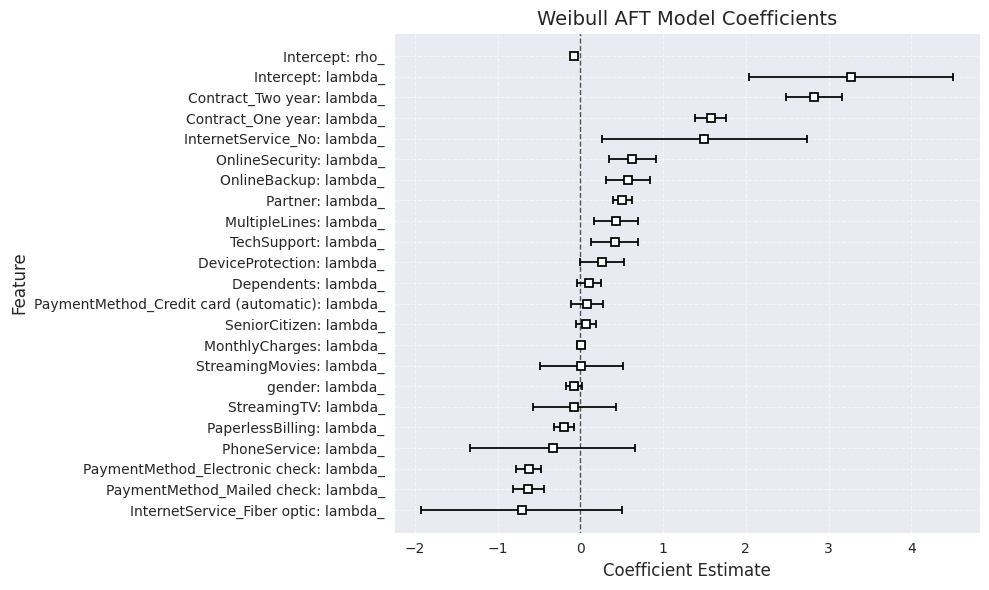

In [149]:
"""
Visualize the coefficients of the Weibull AFT model.

Purpose:
This plot displays the estimated coefficients from the fitted Weibull AFT model,
along with their confidence intervals. Each bar corresponds to a feature and
shows whether it increases or decreases expected survival time.

Interpretation:
- Bars to the **right (positive coefficients)** → increase customer survival time
  (reduce churn risk).
- Bars to the **left (negative coefficients)** → decrease survival time
  (higher likelihood of churn).
- The **length of the bar** represents the magnitude of the effect.
- The **error bars** represent the 95% confidence intervals.

Usage:
This helps identify which customer attributes most strongly affect retention
in the Telco churn dataset.
"""

# =====================================================================
# Step: Plot model coefficients with confidence intervals
# =====================================================================
plt.subplots(figsize=(10, 6))
weibull_aft.plot()

# Add labels and formatting for clarity
plt.title("Weibull AFT Model Coefficients", fontsize=14)
plt.xlabel("Coefficient Estimate", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [150]:
"""
Compute and display the model-predicted median and mean survival times.

Purpose:
These metrics summarize the estimated survival distribution of the fitted
Weibull AFT model across all customers.

Definitions:
- **Median Survival Time:** The time (in months) at which 50% of customers are expected to churn.
- **Mean Survival Time:** The average expected time before churn, considering the full survival distribution.

Interpretation:
- Lower survival times indicate faster churn (shorter customer lifetimes).
- Higher survival times indicate greater retention (longer expected customer tenure).

These metrics are derived directly from the fitted parametric survival model.
"""

# =====================================================================
# Step: Compute central survival time statistics
# =====================================================================

# Median Survival Time (50th percentile of the predicted distribution)
print("Median Survival Time (months):", weibull_aft.median_survival_time_.round(2))

# Mean Survival Time (expected value of survival distribution)
print("Mean Survival Time (months):", weibull_aft.mean_survival_time_.round(2))


Median Survival Time (months): 24.21
Mean Survival Time (months): 37.39


# Random Survival Trees

In [151]:
"""
Install the PyCox library.

PyCox is a Python package built on top of PyTorch, designed for
deep learning–based survival analysis. It provides tools for
implementing models such as:
- DeepSurv (neural Cox proportional hazards model)
- DeepHit (discrete-time survival model)
- LogisticHazard (discrete-time Cox alternative)
- MTLR (multi-task logistic regression)

Why install:
We’ll use PyCox to explore advanced neural survival models that can
capture complex, nonlinear relationships in customer churn data.

Note:
- Run this once per Colab session.
- Restart the runtime if you experience PyTorch-related import conflicts.
"""

# =====================================================================
# Step: Install PyCox
# =====================================================================
!pip install pycox


In [152]:
"""
Import additional libraries for advanced survival modeling and evaluation.

This section brings in tools for:
1. **Model training and evaluation splits** — via scikit-learn.
2. **Tree-based ensemble survival modeling** — via scikit-survival.
3. **Performance metrics and evaluation** — via lifelines and PyCox.

Libraries:
- `train_test_split` : Splits data into training and testing subsets.
- `RandomSurvivalForest` : Ensemble survival model similar to Random Forest,
                           capable of handling nonlinear feature relationships.
- `concordance_index` : Metric for model performance (higher = better concordance).
- `EvalSurv` : PyCox utility for evaluating survival models (e.g., C-index, Brier score, calibration).
"""

# =====================================================================
# Step 1: Data splitting utility (for training/testing)
# =====================================================================
from sklearn.model_selection import train_test_split

# =====================================================================
# Step 2: Ensemble-based survival model
# =====================================================================
from sksurv.ensemble import RandomSurvivalForest

# =====================================================================
# Step 3: Evaluation metrics
# =====================================================================
from lifelines.utils import concordance_index     # Concordance index (model discrimination)
from pycox.evaluation import EvalSurv             # Advanced evaluation tools (PyCox)


In [153]:
"""
Load the raw Telco Customer Churn dataset.

This dataset contains demographic, service usage, and billing information
for telecom customers, along with a churn indicator. It will later be
preprocessed and transformed for survival analysis.

Purpose:
- To explore and validate raw data before feature engineering.
- To confirm column names, data types, and potential cleaning needs.

Columns include:
- customerID : unique identifier (non-predictive)
- gender, SeniorCitizen, Partner, Dependents : demographic features
- tenure : duration of customer retention (key survival variable)
- PhoneService, InternetService, etc. : service features
- MonthlyCharges, TotalCharges : billing information
- Churn : churn outcome (target variable)

The file path is configured for Google Colab (`/content/`).
"""

# =====================================================================
# Step: Load the dataset and inspect its structure
# =====================================================================
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Preview the first 5 rows to verify successful load
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [154]:
"""
Remove non-predictive and problematic columns from the Telco dataset.

Purpose:
- `customerID`: Serves only as a unique identifier. It carries no predictive value
  and can cause data leakage if used in modeling.
- `TotalCharges`: Often contains blank or string values that lead to conversion
  issues. Since it is strongly correlated with `tenure × MonthlyCharges`, it can
  be safely removed to avoid redundancy and multicollinearity.

This cleaning step simplifies the dataset and prepares it for encoding
and model training.
"""

# =====================================================================
# Step: Drop unnecessary columns
# =====================================================================
df = df.drop(['customerID', 'TotalCharges'], axis=1)

# Preview the cleaned dataset
df.head(5)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes


In [155]:
"""
Compute and display basic churn statistics from the Telco dataset.

Purpose:
To understand the dataset composition by calculating the total number
of customers, churned vs. retained counts, and their respective percentages.

Metrics computed:
- Total number of records (N)
- Number of customers who have churned (`Churn == 'Yes'`)
- Number of customers who have not churned (`Churn == 'No'`)
- Percentage distribution of churned vs. retained customers

This quick summary provides insight into the **class balance**,
which is important for model training and evaluation.
"""

# =====================================================================
# Step: Compute dataset statistics
# =====================================================================

# Total number of samples
N = df.shape[0]

# Count churned and non-churned customers
hasNotChurned = sum(df['Churn'] == 'No')
hasChurned = sum(df['Churn'] == 'Yes')

# =====================================================================
# Step: Display dataset summary
# =====================================================================
print(f"Number of samples: {N}")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of customers that have churned: {hasChurned}")
print(f"Number of customers that have not churned yet: {hasNotChurned}")
print(f"Percentage of customers that have churned: {100 * hasChurned / len(df):.0f}%")
print(f"Percentage of customers that have not churned yet: {100 * hasNotChurned / len(df):.0f}%")


Number of samples: 7043
Number of columns: 19
Number of customers that have churned: 1869
Number of customers that have not churned yet: 5174
Percentage of customers that have churned: 27%
Percentage of customers that have not churned yet: 73%


In [156]:
"""
Convert categorical variables into numeric form for modeling.

Steps:
1. Encode the target variable `Churn` as a boolean:
   - 'No'  → False (customer retained)
   - 'Yes' → True  (customer churned)
   This format is directly compatible with survival models.

2. Perform one-hot encoding for categorical features:
   - Expands each categorical variable into binary (0/1) indicator columns.
   - `drop_first=True` removes the first category to prevent multicollinearity.
   - `dtype=float` ensures numeric consistency for model training.

Affected Columns:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
 'PaperlessBilling', 'PaymentMethod']

Output:
A fully numeric DataFrame ready for survival modeling.
"""

# =====================================================================
# Step 1: Encode target variable (churn)
# =====================================================================
df['Churn'] = df['Churn'].map({'No': False, 'Yes': True})

# =====================================================================
# Step 2: One-hot encode categorical predictors
# =====================================================================
categories = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=categories, drop_first=True, dtype=float)


In [157]:
"""
Define survival analysis components: time, event, and feature columns.

Purpose:
To prepare the dataset for survival modeling by clearly separating:
1. `event_col`: The event indicator (whether churn occurred).
2. `time_col`: The duration until the event (customer tenure).
3. `features`: The set of predictor variables (covariates) that will be
   used to model survival or churn risk.

Steps:
- Assign 'Churn' as the event column (True = churned, False = active).
- Assign 'tenure' as the time-to-event column.
- Use `np.setdiff1d()` to extract all other feature columns while excluding
  the event and time variables.

Output:
A list of feature (covariate) column names for modeling.
"""

# =====================================================================
# Step 1: Define event and time columns
# =====================================================================
event_col = 'Churn'   # Whether churn (event) occurred
time_col = 'tenure'   # Time duration until event (in months)

# =====================================================================
# Step 2: Extract predictor feature names
# =====================================================================
# Exclude the time and event columns from the feature set
features = np.setdiff1d(df.columns, [time_col, event_col]).tolist()

# Display the selected feature names
features


['Contract_One year',
 'Contract_Two year',
 'Dependents_Yes',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'InternetService_Fiber optic',
 'InternetService_No',
 'MonthlyCharges',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'PaperlessBilling_Yes',
 'Partner_Yes',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'PhoneService_Yes',
 'SeniorCitizen',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'gender_Male']

In [158]:
print(f'Number of features/covariables: {len(features)}')

Number of features/covariables: 28


# **Data Analysis**



In [159]:
"""
Split the Telco dataset into training and validation sets for survival modeling.

Purpose:
To divide the dataset into training and validation subsets while preserving
index alignment, and prepare the inputs required for survival analysis models.

Steps:
1. Randomly split the full dataset (70% training, 30% validation).
   - The random seed ensures reproducibility.
   - Using `.reset_index()` preserves original indices for correct mapping.

2. Rebuild DataFrames (`data_train`, `data_test`) using the original indices
   to avoid misalignment.

3. Create model-ready inputs:
   - `X_trn`, `X_val`: Feature (covariate) matrices for training and validation.
   - `T_trn`, `T_val`: Time-to-event variables (tenure).
   - `E_trn`, `E_val`: Event indicators (whether churn occurred).

Output:
- Cleanly separated training and validation datasets.
- Prepared inputs suitable for lifelines, scikit-survival, or pycox models.
"""

# =====================================================================
# Step 1: Split the dataset (70% train / 30% validation)
# =====================================================================
index_train, index_test = train_test_split(
    df.reset_index(),
    test_size=0.3,
    random_state=0
)

# =====================================================================
# Step 2: Rebuild datasets using original indices
# =====================================================================
data_train = df.loc[index_train['index']].reset_index(drop=True)
data_test  = df.loc[index_test['index']].reset_index(drop=True)

# =====================================================================
# Step 3: Extract model inputs
# =====================================================================
# Feature matrices
X_trn, X_val = data_train[features], data_test[features]

# Time-to-event variables (tenure)
T_trn, T_val = data_train[time_col], data_test[time_col]

# Event indicators (churn)
E_trn, E_val = data_train[event_col], data_test[event_col]


In [160]:
"""
Prepare data and initialize the Random Survival Forest (RSF) model.

Purpose:
1. Instantiate the RSF model for survival analysis.
2. Filter the training data to include only customers who have experienced
   the event (i.e., those who have churned) — this step may be used
   for exploratory analysis or specific model calibration.

Details:
- The Random Survival Forest (RSF) is a tree-based ensemble model designed
  to handle censored time-to-event data.
- It extends the idea of random forests to survival analysis by
  estimating survival functions non-parametrically.

Steps:
1. Instantiate the RSF model with 100 decision trees and a fixed random seed
   for reproducibility.
2. Filter the training dataset (`X_trn`, `T_trn`, `E_trn`) to only those
   observations where churn (event) has occurred (E_trn == True).

Note:
This subset (`X_trn1`, `T_trn1`, `E_trn1`) can be useful for understanding
patterns specific to churned customers or for model diagnostics.
For model fitting, the full dataset (including censored data) is typically used.
"""

# =====================================================================
# Step 1: Instantiate Random Survival Forest model
# =====================================================================
rsf = RandomSurvivalForest(
    n_estimators=100,  # number of trees in the forest
    random_state=0     # ensures reproducibility
)

# =====================================================================
# Step 2: Filter churned customers (event == True)
# =====================================================================
X_trn1 = X_trn[E_trn == True]  # Features of churned customers
T_trn1 = T_trn[E_trn == True]  # Time until churn
E_trn1 = E_trn[E_trn == True]  # Event indicator (all True)


In [161]:
"""
Construct the structured survival target array required by scikit-survival.

Purpose:
To create a structured NumPy record array (`y_trn`) that combines:
- Event status (whether the customer churned)
- Time to event (tenure duration)

This format is essential for scikit-survival models, which expect
targets in the form of structured arrays with named fields.

Structure:
Each record in `y_trn` contains:
    ('event', 'time')
where:
    - event : Boolean → True if churn occurred, False if censored (still active)
    - time  : Float   → Tenure duration (in months)

Steps:
1. Convert `E_trn` (event indicator) to boolean type for clarity.
2. Combine `E_trn` and `T_trn` into a structured NumPy array using
   `np.rec.fromarrays()`.
3. Assign column names `event` and `time` for compatibility with survival models.

Output:
`y_trn`: Structured survival array usable by scikit-survival models.
"""

# =====================================================================
# Step: Create structured survival target for training data
# =====================================================================
y_trn = np.rec.fromarrays(
    [E_trn.astype(bool), T_trn],   # combine event + time
    names=['event', 'time']        # define field names
)


In [162]:
"""
Fit the Random Survival Forest (RSF) model on the training dataset.

Purpose:
To train an ensemble-based survival model that estimates the probability
of customer retention (or churn) over time using censored data.

Model:
- The Random Survival Forest is an extension of the traditional random forest
  designed for time-to-event (survival) data.
- Each decision tree models survival probability curves rather than
  point predictions.

Steps:
1. Call `fit()` on the RSF model using:
   - `X_trn`: Predictor variables (customer attributes)
   - `y_trn`: Structured survival targets containing 'event' and 'time'
2. The RSF learns the relationship between covariates and churn time,
   accounting for both observed (churned) and censored (active) customers.

Output:
A trained RSF model ready for:
- Predicting survival functions
- Estimating cumulative hazards
- Calculating risk scores
- Model evaluation (via Concordance Index or integrated Brier Score)
"""

# =====================================================================
# Step: Fit the Random Survival Forest model
# =====================================================================
rsf.fit(X_trn, y_trn)


RandomSurvivalForest(random_state=0)

In [163]:
"""
Evaluate the trained Random Survival Forest (RSF) model using Concordance Index (C-index).

Purpose:
To assess how well the RSF model predicts the ordering of survival times
(i.e., whether customers predicted to churn earlier actually do so).

Metric:
- **Concordance Index (C-index)** measures predictive discrimination:
  - Values range between 0.5 (random prediction) and 1.0 (perfect prediction).
  - It represents the proportion of correctly ordered pairs of observations
    with respect to their predicted risk and observed survival times.

Steps:
1. Construct the structured survival array `y_val` for the validation dataset,
   similar to the training target (`y_trn`).
2. Use the `score()` method from scikit-survival, which computes the C-index.
3. Print the test set performance score.

Output:
C-index on the test set, indicating how accurately the model ranks
customers by their churn risk over time.
"""

# =====================================================================
# Step 1: Prepare structured validation target
# =====================================================================
y_val = np.rec.fromarrays(
    [E_val.astype(bool), T_val],   # Combine event and time data
    names=['event', 'time']        # Define field names
)

# =====================================================================
# Step 2: Evaluate RSF model using Concordance Index
# =====================================================================
c_index = rsf.score(X_val, y_val)

# =====================================================================
# Step 3: Display model performance
# =====================================================================
print("Concordance index on test set: {:.3f}".format(c_index))


Concordance index on test set: 0.844


In [164]:
"""
Compute and compare the Concordance Index (C-index) of the Random Survival Forest
on both training and validation datasets.

Purpose:
To evaluate how well the trained RSF model generalizes by comparing performance
on the data it was trained on versus unseen validation data.

Metric:
- **Concordance Index (C-index)** evaluates the model’s ability to correctly
  rank customers by churn risk (i.e., survival time ordering).
- A higher C-index indicates better discriminative performance.

Steps:
1. Use the trained RSF model to predict risk scores for training and validation sets.
   - Negative predictions (`-rsf.predict(...)`) are used because higher risk
     corresponds to lower survival time.
2. Calculate the C-index for both datasets using `lifelines.utils.concordance_index`.
3. Print and compare the training and validation results.

Output:
Displays the C-index for:
- Training data (`ci_rsf_trn`)
- Validation data (`ci_rsf_val`)
"""

# =====================================================================
# Step 1: Compute Concordance Index for training data
# =====================================================================
ci_rsf_trn = concordance_index(
    T_trn,                   # actual time to event (tenure)
    -rsf.predict(X_trn),     # negative risk scores (higher = higher risk)
    E_trn                    # event indicator (True = churned)
)

# =====================================================================
# Step 2: Compute Concordance Index for validation data
# =====================================================================
ci_rsf_val = concordance_index(
    T_val,                   # actual time to event (tenure)
    -rsf.predict(X_val),     # negative risk scores
    E_val                    # event indicator
)

# =====================================================================
# Step 3: Display performance comparison
# =====================================================================
print(f'Concordance index of Random Survival Forest: '
      f'train: {ci_rsf_trn:.3f}, valid: {ci_rsf_val:.3f}')


Concordance index of Random Survival Forest: train: 0.901, valid: 0.844


In [165]:
"""
Import permutation importance for feature interpretability.

Purpose:
The `permutation_importance` function from scikit-learn is used to measure
the importance of each feature by evaluating the decrease in model
performance when that feature’s values are randomly shuffled.

Why this matters for survival analysis:
- It helps identify which customer attributes (e.g., Contract type,
  InternetService, PaymentMethod) most affect churn risk.
- Works directly with the Random Survival Forest model’s `score()` method,
  making it compatible with scikit-survival estimators.

Usage:
After training the RSF model, you can apply permutation importance on
the validation set to quantify feature contributions to predictive accuracy.
"""

# =====================================================================
# Step: Import permutation importance utility
# =====================================================================
from sklearn.inspection import permutation_importance


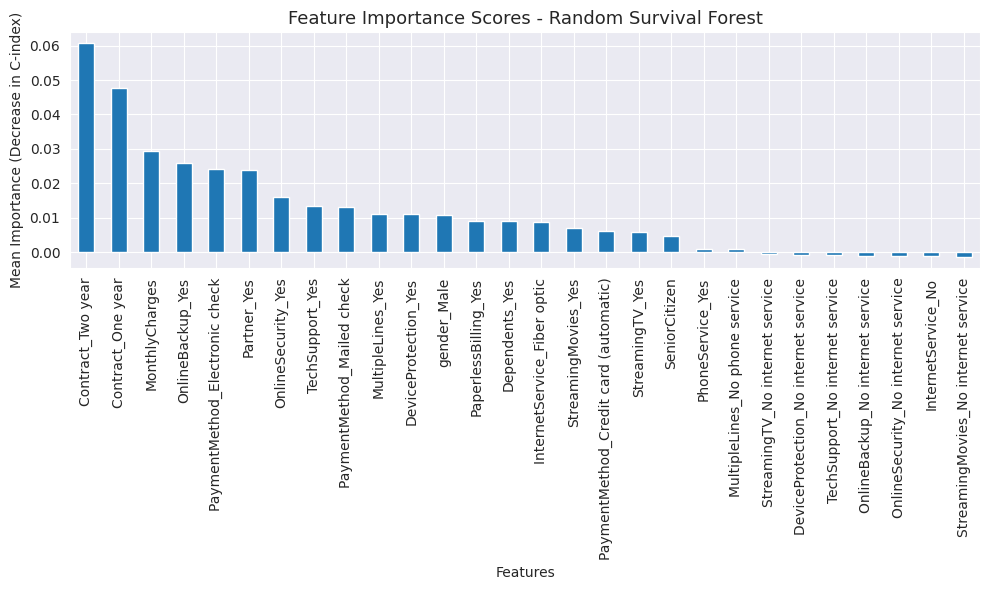

In [166]:
"""
Compute and visualize feature importance using permutation importance
for the Random Survival Forest (RSF) model.

Purpose:
To identify which features have the greatest influence on customer survival
(churn risk) by quantifying how much model performance decreases when
individual feature values are randomly shuffled.

Method:
- **Permutation importance** measures the drop in model accuracy (C-index)
  after breaking the relationship between a feature and the outcome.
- This approach provides a model-agnostic measure of feature relevance.

Steps:
1. Compute permutation importances using the trained RSF model on training data.
   - `n_repeats=10`: Repeats shuffling multiple times for stability.
   - `random_state=0`: Ensures reproducibility.
2. Store the mean importance score for each feature.
3. Sort features by descending importance.
4. Visualize the ranked importances as a horizontal bar plot.

Output:
A ranked plot showing which customer attributes most affect churn survival
predictions according to the RSF model.
"""

# =====================================================================
# Step 1: Compute permutation importances
# =====================================================================
result = permutation_importance(
    rsf,
    X_trn,        # feature matrix
    y_trn,        # structured survival targets
    n_repeats=10, # number of random shuffles per feature
    random_state=0
)

# =====================================================================
# Step 2: Build importance series and sort descending
# =====================================================================
feature_importances = (
    pd.Series(result.importances_mean, index=X_trn.columns)
    .sort_values(ascending=False)
)

# =====================================================================
# Step 3: Plot feature importance scores
# =====================================================================
fig, ax = plt.subplots(figsize=(10, 6))
feature_importances.plot.bar(ax=ax)
ax.set_title("Feature Importance Scores - Random Survival Forest", fontsize=13)
ax.set_xlabel("Features")
ax.set_ylabel("Mean Importance (Decrease in C-index)")
plt.tight_layout()
plt.show()
